# Preprocessing

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

import tensorflow
from keras.models import Sequential
from tensorflow.keras.models import Model as mModel
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Input
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
from tensorflow.keras.layers import Dropout,add
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

from datetime import timedelta 
from datetime import date

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
window_size = 20

end_date = '2018-09-01'
training_start_date = '2020-04-01'
total_end_date = '2020-12-31'

In [3]:
df_target = pd.read_csv('dataset_target.csv')
df_target.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-05-10,953.750000,945.000000,953.500000,948.950012,2096500,948.950012
1,2017-05-11,950.289978,940.780029,945.109985,947.619995,2194100,947.619995
2,2017-05-12,962.789978,951.530029,954.500000,961.349976,3625900,961.349976
3,2017-05-15,963.150024,956.059998,958.729980,957.969971,4270600,957.969971
4,2017-05-16,970.059998,960.909973,961.000000,966.070007,3126100,966.070007


In [4]:
#plt.plot(df_target["High"])

In [5]:
#plt.plot(df_target.set_index('Date')[:'2018-09-01'].reset_index()["Adj Close"])

In [6]:
#plt.plot(df_target.set_index('Date')['2020-01-01':].reset_index()["Adj Close"])

In [7]:
#plt.plot(df_target.set_index('Date')['2020-04-01':].reset_index()["High"])

In [8]:
df_target['Moving_av'] = df_target['Adj Close'].rolling(window = window_size,min_periods = 0).mean()

i=1
upper_volatility=[df_target.iloc[0]['Moving_av']] 
lower_volatility=[df_target.iloc[0]['Moving_av']] 
while i<len(df_target):
    upper_volatility.append(df_target.iloc[i-1]['Moving_av']+3/100*df_target.iloc[i-1]['Moving_av'])
    lower_volatility.append(df_target.iloc[i-1]['Moving_av']-3/100*df_target.iloc[i-1]['Moving_av'])
    i+=1

df_target['Upper_volatility'] = upper_volatility
df_target['Lower_volatility'] = lower_volatility

In [9]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]
direction_change_in_adj_close=[1]

while i<len(df_target):
    rate_increase_in_vol.append((df_target.iloc[i]['Volume']-df_target.iloc[i-1]['Volume'])) 
    rate_increase_in_adj_close.append((df_target.iloc[i]['Adj Close']-df_target.iloc[i-1]['Adj Close']))
    if ((df_target.iloc[i]['Adj Close']-df_target.iloc[i-1]['Adj Close']) >= 0):
        direction_change_in_adj_close.append(1)
    else:
        direction_change_in_adj_close.append(0)
    i+=1
    
df_target['Increase_in_vol']=rate_increase_in_vol
df_target['Increase_in_adj_close']=rate_increase_in_adj_close    
df_target['Direction_change_in_adj_close']=direction_change_in_adj_close    

In [10]:
df_target['Short_resistance'] = df_target['High'].rolling(window =3,min_periods =0).max()
df_target['Short_support'] = df_target['Low'].rolling(window=3,min_periods=0).min()
df_target['Long_resistance'] = df_target['High'].rolling(window=7,min_periods=0).max()
df_target['Long_support'] = df_target['Low'].rolling(window=7,min_periods=0).min()

In [11]:
# plt.figure(figsize=(20,10))
# plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
# #plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'purple', label = 'average')
# plt.plot(list(df_target.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
# plt.plot(list(df_target.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
# plt.plot(list(df_target.iloc[:]['Short_support']), color = 'red', label = 'short Support')
# plt.plot(list(df_target.iloc[:]['Short_resistance']), color = 'black', label = 'short Resistance')
# plt.title('Stock Price Prediction')
# plt.xlabel('Trading Day')
# plt.ylabel('Stock Price & average')
# plt.legend()
# plt.show()

In [12]:
# plt.figure(figsize=(20,10))
# plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
# #plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'red', label = 'average')
# plt.plot(list(df_target.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
# plt.plot(list(df_target.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
# plt.plot(list(df_target.iloc[:]['Long_support']), color = 'red', label = 'Long Support')
# plt.plot(list(df_target.iloc[:]['Long_resistance']), color = 'black', label = 'Long Resistance')
# plt.title('Stock Price Prediction')
# plt.xlabel('Trading Day')
# plt.ylabel('Stock Price & average')
# plt.legend()
# plt.show()

In [13]:
# plt.figure(figsize=(20,10))
# #plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
# plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'green', label = 'average')
# plt.plot(list(df_target.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
# plt.plot(list(df_target.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
# plt.plot(list(df_target.iloc[:]['Long_support']), color = 'red', label = 'Long Support')
# plt.plot(list(df_target.iloc[:]['Long_resistance']), color = 'black', label = 'Long Resistance')
# plt.title('Stock Price Prediction')
# plt.xlabel('Trading Day')
# plt.ylabel('Stock Price & average')
# plt.legend()
# plt.show()

In [14]:
# plt.figure(figsize=(20,10))
# #plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
# plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'green', label = 'average')
# plt.plot(list(df_target.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
# plt.plot(list(df_target.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
# plt.plot(list(df_target.iloc[:]['Short_support']), color = 'red', label = 'short Support')
# plt.plot(list(df_target.iloc[:]['Short_resistance']), color = 'black', label = 'short Resistance')
# plt.title('Stock Price Prediction')
# plt.xlabel('Trading Day')
# plt.ylabel('Stock Price & average')
# plt.legend()
# plt.show()

### Adding Trends

In [15]:
df_target.to_csv('dataset_prepared.csv',index = False)
df_main = pd.read_csv('dataset_prepared.csv')

In [16]:
df_trends = pd.read_csv('amazon_trends.csv')

In [17]:
import datetime
dates = []
i = 0
while i< len(df_trends):
    dates.append(datetime.date(int(df_trends.iloc[i]['Week'].split('-')[0]),int(df_trends.iloc[i]['Week'].split('-')[1]),int(df_trends.iloc[i]['Week'].split('-')[2])))
    i+=1
    
df_trends['date'] = dates
df_trends_req = df_trends[df_trends['date']> datetime.date(2017,5,5)]

In [18]:
days = []
trend =[]

i = 0
while i<len(df_trends_req):
    day = df_trends_req.iloc[i]['date']
    dates = [dates for dates in (day - datetime.timedelta(n) for n in range(7))]
    
    dates.reverse()
    j = 0
    while j< len(dates):
        days.append(dates[j])
        trend.append(df_trends_req.iloc[i]['Amazon.com: (Worldwide)'])
        j +=1
    i+=1

In [19]:
df_trend_final = pd.DataFrame(list(zip(days,trend)),columns = ['Date','trend_hit'])
df_trend_final.to_csv('Trends_preprocessed.csv',index = False)
df_trend_final = pd.read_csv('Trends_preprocessed.csv')

In [20]:
df_2=pd.merge(df_main,df_trend_final,how="inner",on="Date")

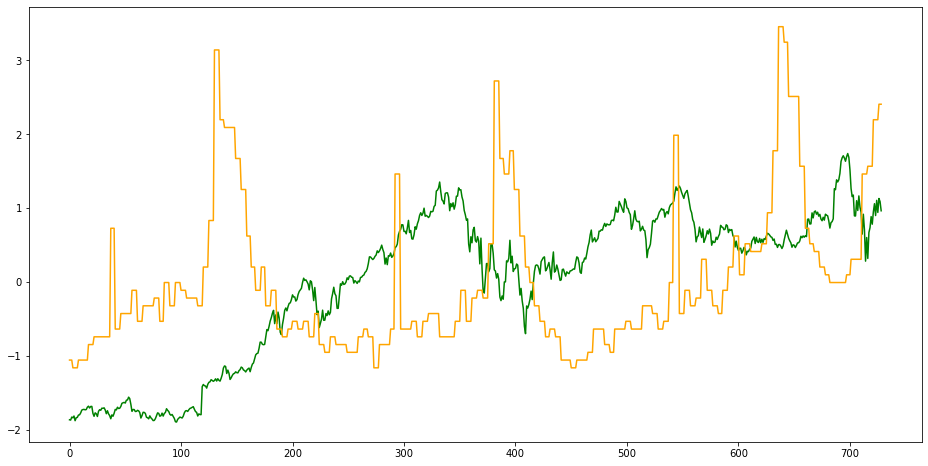

In [21]:
plt.figure(figsize=(16,8))
sc = StandardScaler()
plt.plot(sc.fit_transform(np.array(df_2.set_index('Date')['Adj Close'][:training_start_date]).reshape(-1,1)), color = 'green', label = 'Adj Close')
plt.plot(sc.fit_transform(np.array(df_2.set_index('Date')['trend_hit'][:training_start_date]).reshape(-1,1)), color = 'orange', label = 'snp500')

### Additing Indicators

In [22]:
df_dj = pd.read_csv('dow_jones.csv')
df_sp = pd.read_csv('sp500.csv')
df_dj_n_sp = pd.merge(df_dj,df_sp, how = "inner", on = "date")
df_dj_n_sp.columns = ['Date','Dow_jones','snp500']

In [23]:
df_dj_n_sp.head()

,Date,Dow_jones,snp500
0,2008-01-07,12827.49,1416.18
1,2008-01-08,12589.07,1390.19
2,2008-01-09,12735.31,1409.13
3,2008-01-10,12853.09,1420.33
4,2008-01-11,12606.30,1401.02


In [24]:
df_3=pd.merge(df_2,df_dj_n_sp,how="inner",on="Date")
df_3.to_csv('Without_News.csv',index = False)

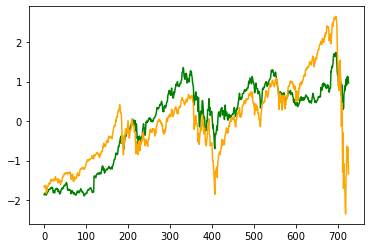

In [25]:
sc = StandardScaler()
plt.plot(sc.fit_transform(np.array(df_3.set_index('Date')['Adj Close'][:training_start_date]).reshape(-1,1)), color = 'green', label = 'Adj Close')
plt.plot(sc.fit_transform(np.array(df_3.set_index('Date')['snp500'][:training_start_date]).reshape(-1,1)), color = 'orange', label = 'snp500')
#plt.plot(sc.fit_transform(np.array(df_3.set_index('Date')['Dow_jones'][:training_start_date]).reshape(-1,1)), color = 'blue', label = 'Dow_jones')

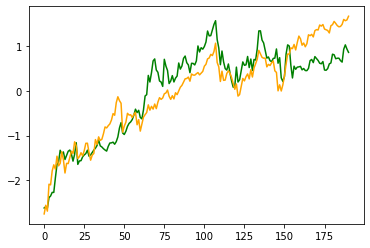

In [26]:
sc = StandardScaler()
plt.plot(sc.fit_transform(np.array(df_3.set_index('Date')['Adj Close'][training_start_date:]).reshape(-1,1)), color = 'green', label = 'Adj Close')
plt.plot(sc.fit_transform(np.array(df_3.set_index('Date')['snp500'][training_start_date:]).reshape(-1,1)), color = 'orange', label = 'snp500')
#plt.plot(sc.fit_transform(np.array(df_3.set_index('Date')['Dow_jones'][training_start_date:]).reshape(-1,1)), color = 'blue', label = 'Dow_jones')

In [27]:
fldr = "Relevant/"
files = os.listdir(fldr)
tickers = [file[:-4]for file in files]
tickers.insert(0,'Date')

In [28]:
df_temp = pd.read_csv('Dataset_temp.csv')
df_tickers = df_temp[tickers]

In [29]:
df_4 = pd.merge(df_3,df_tickers,how="inner",on = "Date")
df_4.to_csv('included_tickers.csv',index = False)

### Adding News

In [30]:
df_news = pd.read_excel('News_articles_2.xlsx')

In [31]:

months=['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.']
i=0
news=[]
date=[]
while i<len(df_news):
    if i%2==0:
        news.append(df_news.iloc[i]['News'])
    else:
        words=df_news.iloc[i]['News'].split(' ')
        for word in words:
            if word in months:
                month=months.index(word)+1
                
            if word[:-1].isnumeric():
                if int(word[:-1])<32:
                    day=int(word[:-1])
                else:
                    year=int(word[:4])
        #print(str(day)+'/'+str(month)+'/'+str(year))
        day_n=datetime.date(year,month,day)
        date.append(day_n)
    i+=1

In [32]:
df_news = pd.DataFrame(list(zip(news,date)),columns = ['News','Date'])
df_news = df_news.sort_values(by = ['Date'])

In [33]:
analyzer = SentimentIntensityAnalyzer()
scores = df_news['News'].apply(analyzer.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)

In [34]:
df_news_final = pd.concat([df_news,scores_df],axis = 1)
df_news_final = df_news_final.drop(['News'],axis =1)

In [35]:
mean_scores = df_news_final.groupby(['Date']).mean()
mean_scores = mean_scores.reset_index()
mean_scores.to_csv('Final_news.csv',index = False)

In [36]:
df_main = pd.read_csv('included_tickers.csv')

In [37]:
df_news = pd.read_csv('Final_news.csv')
df_5 = pd.merge(df_main,df_news,how = "left",on = "Date")

In [38]:
df_6 = df_5.fillna(0.0)
df_6['compound_moving_avg'] = df_6['compound'].rolling(window = 30,min_periods = 0).mean()
df_6['pos_moving_avg'] = df_6['pos'].rolling(window = 30,min_periods = 0).mean()

In [39]:
df_6.to_csv('Final_preprocessed.csv',index = False)
df_main = pd.read_csv('Final_preprocessed.csv')

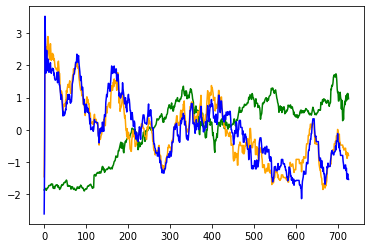

In [40]:
sc = StandardScaler()
plt.plot(sc.fit_transform(np.array(df_6.set_index('Date')['Adj Close'][:training_start_date]).reshape(-1,1)), color = 'green', label = 'Adj Close')
plt.plot(sc.fit_transform(np.array(df_6.set_index('Date')['compound_moving_avg'][:training_start_date]).reshape(-1,1)), color = 'orange', label = 'snp500')
plt.plot(sc.fit_transform(np.array(df_6.set_index('Date')['pos_moving_avg'][:training_start_date]).reshape(-1,1)), color = 'blue', label = 'snp500')

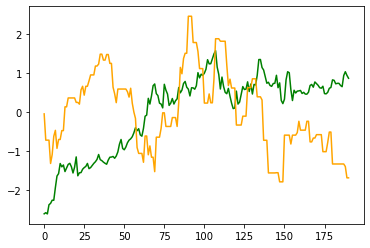

In [41]:
sc = StandardScaler()
plt.plot(sc.fit_transform(np.array(df_6.set_index('Date')['Adj Close'][training_start_date:]).reshape(-1,1)), color = 'green', label = 'Adj Close')
plt.plot(sc.fit_transform(np.array(df_6.set_index('Date')['compound_moving_avg'][training_start_date:]).reshape(-1,1)), color = 'orange', label = 'snp500')

### RNN_data Handling

In [42]:
RNN_data_cols = ['High','Low','Open','Adj Close']

Regression_data_cols = ['Upper_volatility','Lower_volatility','Short_resistance',
                        'Short_support','Long_resistance','Long_support','trend_hit',
                        'Dow_jones','snp500','compound','neg','neu','pos','BF-B','CTAS',
                        'CPRT','AJG','HUM','MKTX','INFO','CHD','A','APD']

Target_column= ['High', 'Low', 'Open','Adj Close']

In [43]:
Regression_data_cols = ['compound_moving_avg']

In [44]:
from datetime import date
end_date = '2018-09-01'
training_start_date = '2020-04-01'
total_end_date = '2020-12-31'
df_main_test_tmp = df_main.set_index('Date')[training_start_date:]

In [45]:
df_main_train = df_main.set_index('Date')[:training_start_date]
df_main_test = df_main.iloc[df_main.shape[0] - df_main_test_tmp.shape[0] - window_size:]

In [46]:
RNN_data_train = df_main_train[RNN_data_cols]
Regression_data_train = df_main_train[Regression_data_cols]
Regression_train = Regression_data_train.values

RNN_data_test = df_main_test[RNN_data_cols]
Regression_data_test = df_main_test[Regression_data_cols]
Regression_test = Regression_data_test.values

In [47]:
df_target_train = df_main_train[Target_column]
df_target_test = df_main_test[Target_column]

df_target_n_train = df_main_train[Target_column].values
df_target_n_test = df_main_test[Target_column].values

RNN_data_n_train = df_main_train[RNN_data_cols].values
RNN_data_n_test = df_main_test[RNN_data_cols].values

In [48]:
sc_RNN = MinMaxScaler((-1,1))
sc_Regression = MinMaxScaler((-1,1))
sc_Target = MinMaxScaler((-1,1))

if RNN_data_n_train.shape[1] > len(Target_column):
    RNN_data_n_train_scaled = sc_RNN.fit_transform(RNN_data_n_train[:,len(Target_column):])
Regression_data_train_scaled = sc_Regression.fit_transform(Regression_train)
df_target_n_train_scaled = sc_Target.fit_transform(df_target_train)

if RNN_data_n_test.shape[1] > len(Target_column):
    RNN_data_n_test_scaled = sc_RNN.transform(RNN_data_n_test[:,len(Target_column):])
Regression_data_test_scaled = sc_Regression.transform(Regression_test)
df_target_n_test_scaled = sc_Target.transform(df_target_n_test)

In [49]:
import numpy as np
RNN_train = []
y_train = []
for i in range(window_size,len(df_target_n_train_scaled)):
    if RNN_data_n_train.shape[1] > len(Target_column):
        tmp = np.concatenate((df_target_n_train_scaled[i-window_size:i,:],RNN_data_n_train_scaled[i-window_size:i,:]), axis = 1).reshape(window_size, -1)
    else:
        tmp = df_target_n_train_scaled[i-window_size:i,:].reshape(window_size, -1)
    RNN_train.append(tmp)
    y_train.append(df_target_n_train_scaled[i,:])
    
RNN_train, y_train = np.array(RNN_train), np.array(y_train)

In [50]:
RNN_train.shape

(707, 20, 4)

In [51]:
RNN_test = []
y_test = []
for i in range(window_size,len(df_target_n_test_scaled)):
    if RNN_data_n_test.shape[1] > len(Target_column):
        RNN_test.append(np.concatenate((df_target_n_test_scaled[i-window_size:i,:],RNN_data_n_test_scaled[i-window_size:i,:]), axis = 1))
    else:
        RNN_test.append(df_target_n_test_scaled[i-window_size:i,:].reshape(window_size, -1))
    y_test.append(df_target_n_test_scaled[i,:])
    
RNN_test, y_test = np.array(RNN_test), np.array(y_test)

In [52]:
RNN_test.shape

(191, 20, 4)

### Modeling

In [53]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 80, return_sequences = True, input_shape = (RNN_train.shape[1], RNN_train.shape[2])))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 40, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 40, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 40))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 4))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

callback_es=tensorflow.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=30, verbose=0,
    mode='min', baseline=None, restore_best_weights=False)

# Fitting the RNN to the Training set
model.fit(RNN_train, y_train, epochs = 300, batch_size = 40,
         callbacks = [callback_es])

Epoch 1/300
18/18 [==============================] - 5s 24ms/step - loss: 0.1286
Epoch 2/300
18/18 [==============================] - 0s 21ms/step - loss: 0.0422
Epoch 3/300
18/18 [==============================] - 0s 22ms/step - loss: 0.0304
Epoch 4/300
18/18 [==============================] - 0s 22ms/step - loss: 0.0283
Epoch 5/300
18/18 [==============================] - 0s 22ms/step - loss: 0.0218
Epoch 6/300
18/18 [==============================] - 0s 23ms/step - loss: 0.0241
Epoch 7/300
18/18 [==============================] - 1s 29ms/step - loss: 0.0236
Epoch 8/300
18/18 [==============================] - 0s 28ms/step - loss: 0.0204
Epoch 9/300
18/18 [==============================] - 1s 29ms/step - loss: 0.0230
Epoch 10/300
18/18 [==============================] - 0s 28ms/step - loss: 0.0214
Epoch 11/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0189
Epoch 12/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0190
Epoch 13/300
18/18 [=====

18/18 [==============================] - 0s 25ms/step - loss: 0.0060
Epoch 102/300
18/18 [==============================] - 0s 25ms/step - loss: 0.0065
Epoch 103/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0058
Epoch 104/300
18/18 [==============================] - 0s 26ms/step - loss: 0.0070
Epoch 105/300
18/18 [==============================] - 0s 25ms/step - loss: 0.0058
Epoch 106/300
18/18 [==============================] - 0s 26ms/step - loss: 0.0066
Epoch 107/300
18/18 [==============================] - 0s 25ms/step - loss: 0.0061
Epoch 108/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0057
Epoch 109/300
18/18 [==============================] - 0s 25ms/step - loss: 0.0059
Epoch 110/300
18/18 [==============================] - 0s 26ms/step - loss: 0.0062
Epoch 111/300
18/18 [==============================] - 0s 25ms/step - loss: 0.0062
Epoch 112/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0057
Epoch 113/300
18/1

In [54]:
from tensorflow.keras.utils import plot_model
import pydot

#def model(): 
#    RNN = Sequential()
##    RNN.add(LSTM(units = 80, return_sequences = True, input_shape = (RNN_train.shape[1], RNN_train.shape[2])))
 #   RNN.add(Dropout(0.2))
 #   RNN.add(LSTM(units = 40, return_sequences = True))
 #   RNN.add(Dropout(0.2))
 #   RNN.add(LSTM(units = 40, return_sequences = True))
 #   RNN.add(Dropout(0.2))
 #   RNN.add(LSTM(units = 40, return_sequences = True))
 #   RNN.add(Dropout(0.2))
 #   RNN.add(Dense(units = 4))
 #   
 #   RNN.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
 #   RNN.summary()
    
   
    
   # return RNN

In [55]:
#RNN = model()
#plot_model(RNN, to_file = 'RNN_plot.png', show_shapes = True)

In [56]:
predicted_train =  model.predict([RNN_train])
predicted_stock_price_train = sc_Target.inverse_transform(predicted_train)
actual_stock_price_train = sc_Target.inverse_transform(y_train)

In [57]:
a = np.array([0 if i < 0.5 else 1 for i in predicted_stock_price_train[:,4:5]])
b = np.array([0 if i < 0.5 else 1 for i in actual_stock_price_train[:,4:5]])
np.sum(a == b) / len(a)

<ipython-input-57-f1c8f62d267b>:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  a = np.array([0 if i < 0.5 else 1 for i in predicted_stock_price_train[:,4:5]])
<ipython-input-57-f1c8f62d267b>:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  b = np.array([0 if i < 0.5 else 1 for i in actual_stock_price_train[:,4:5]])


1.0

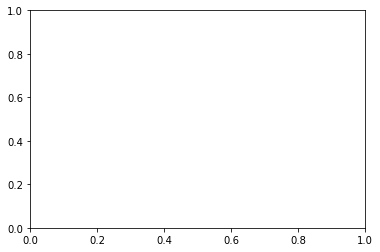

In [58]:
fig, ax = plt.subplots()

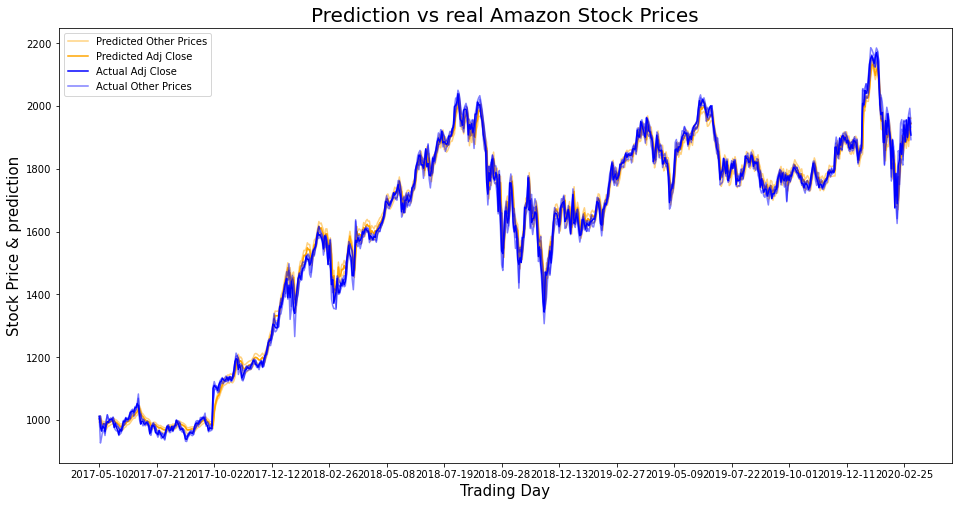

In [59]:
plt.figure(figsize=(16,8))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


line1,line1_1, line1_2 = plt.plot(predicted_stock_price_train[:,:3], color = 'orange', label = 'Predicted Other Prices', alpha = 0.5)
line2, = plt.plot(predicted_stock_price_train[:,3:4], color = 'orange', label = 'Predicted Adj Close')

line3, = plt.plot(actual_stock_price_train[:,3:4], color = 'blue', label = 'Actual Adj Close')
line4, line4_1, line4_2 = plt.plot(actual_stock_price_train[:,:3], color = 'blue', label = 'Actual Other Prices', alpha = 0.5)

plt.xticks(np.arange(0,df_main_train.shape[0],50), df_main_train.index[np.arange(0,df_main_train.shape[0],50)])

plt.title('Prediction vs real Amazon Stock Prices', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)
plt.legend(handles=[line1, line2, line3, line4])
plt.show()

In [60]:
prices_indeces= ['High', 'Low', 'Open','Adj Close', 'Direction_change_in_adj_close']
for j in np.arange(4):
    price_index = prices_indeces[j]
    count = 0
    for i in np.arange(1, len(predicted_stock_price_train)):
        predicted_price_increase = predicted_stock_price_train[i,j] - predicted_stock_price_train[i-1,j]
        price_increase = actual_stock_price_train[i,j] - actual_stock_price_train[i-1,j]
        if (predicted_price_increase * price_increase) >= 0:
            count = count + 1
            
    output_str = ''.join([price_index, ": ", str(count / len(predicted_stock_price_train))])
    print(output_str)

High: 0.6195190947666195
Low: 0.5770862800565771
Open: 0.6831683168316832
Adj Close: 0.4908062234794908


In [61]:
predicted = model.predict(RNN_test)
predicted_stock_price = sc_Target.inverse_transform(predicted)
actual_stock_price = sc_Target.inverse_transform(y_test)

In [62]:
a = np.array([0 if i < 0.5 else 1 for i in predicted_stock_price[:,4:5]])
b = np.array([0 if i < 0.5 else 1 for i in actual_stock_price[:,4:5]])
np.sum(a == b) / len(a)

<ipython-input-62-f28e24049ebd>:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  a = np.array([0 if i < 0.5 else 1 for i in predicted_stock_price[:,4:5]])
<ipython-input-62-f28e24049ebd>:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  b = np.array([0 if i < 0.5 else 1 for i in actual_stock_price[:,4:5]])


1.0

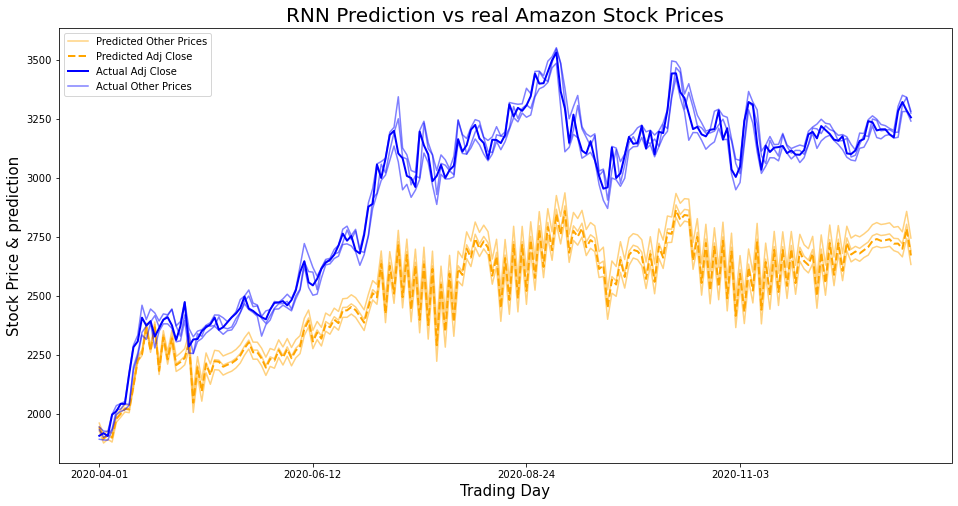

In [63]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.figure(figsize=(16,8))
line1,line1_1, line1_2 = plt.plot(predicted_stock_price[:,:3], color = 'orange', label = 'Predicted Other Prices', alpha = 0.5)
line2, = plt.plot(predicted_stock_price[:,3:4], color = 'orange', label = 'Predicted Adj Close',linewidth=2.0,linestyle = 'dashed')

line3, = plt.plot(actual_stock_price[:,3:4], color = 'blue', label = 'Actual Adj Close', linewidth=2.0)
line4, line4_1, line4_2 = plt.plot(actual_stock_price[:,:3], color = 'blue', label = 'Actual Other Prices', alpha = 0.5)

plt.xticks(np.arange(0,df_main_test_tmp.shape[0],50), df_main_test_tmp.index[np.arange(0,df_main_test_tmp.shape[0],50)])

plt.title('RNN Prediction vs real Amazon Stock Prices', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)
plt.legend(handles=[line1, line2, line3, line4])
plt.show()

In [64]:
df_main_test_tmp.index[np.arange(0,df_main_test_tmp.shape[0],50)]

Index(['2020-04-01', '2020-06-12', '2020-08-24', '2020-11-03'], dtype='object', name='Date')

In [65]:
prices_indeces= ['High', 'Low', 'Open','Adj Close', 'Direction_change_in_adj_close']
for j in np.arange(4):
    price_index = prices_indeces[j]
    count = 0
    for i in np.arange(1, len(predicted_stock_price)):
        predicted_price_increase = predicted_stock_price[i,j] - predicted_stock_price[i-1,j]
        price_increase = actual_stock_price[i,j] - actual_stock_price[i-1,j]
        if (predicted_price_increase * price_increase) >= 0:
            count = count + 1
            
    output_str = ''.join([price_index, ": ", str(count / len(predicted_stock_price))])
    print(output_str)

High: 0.5602094240837696
Low: 0.6073298429319371
Open: 0.612565445026178
Adj Close: 0.5497382198952879


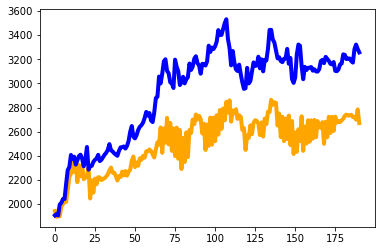

In [66]:
plt.plot(predicted_stock_price[:,3:4], color = 'orange', label = 'Predicted Adj Close',linewidth=4.0)

plt.plot(actual_stock_price[:,3:4], color = 'blue', label = 'Actual Adj Close', linewidth=4.0)

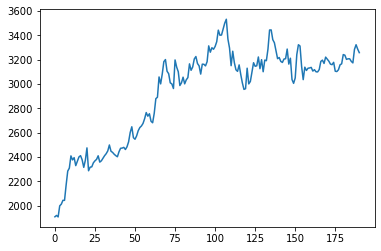

In [67]:
plt.plot(actual_stock_price[:,3:4])

In [68]:
actual_close = actual_stock_price[:,3:4]

In [69]:
predicted_close = predicted_stock_price[:,3:4]

In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual_close,predicted_close)
mse

214517.39748383642

In [71]:
#Iterative Investing aka PaperHands
initial_balance = 1000000
duration = len(actual_stock_price)-1
performance = np.array([])
stock_count = np.array([])
stocks = 0
balance = initial_balance
total_val = []
print("starting balance: $" + str(initial_balance))
for day in range(duration): 

    price_tdy = actual_close[day]
    price_tmr = actual_close[day +1]

    print('\n'+ "Trading day: " + str(day))
    print("Price Today: $" +"{:.2f}".format(price_tdy[0]))
    print("Predicted Price Tomorrow: $" + "{:.2f}".format(price_tmr[0]))
    
    if price_tmr < price_tdy:    #expected decrease in value
        buy = False
        print("The stock will depreciate")
    else: 
        buy = True
        print("BUY!")
    
    if buy == True: 
        buyPrice = price_tdy *20
        if balance - buyPrice >0:       #need enough money to buy
            stocks += 20               #buy 20 shares if price is going up tomorrow
            balance -= price_tdy *20
            print("Action Taken: Bought")
        else: 
            print("You don't have enough money to buy")
            print("Current Balance: $" + "{:.2f}".format(balance[0]))
    else:
        if stocks >=20:     #need enough stock to sell 
            stocks -= 20              #sell 20 shares if price is going down
            balance += price_tdy *20
            print("Action Taken: Sold")
        else: 
            print("You don't have stock to sell")


    print("Number of Stocks: " + str(stocks))
    print("Portfolio Value: $" + str(stocks*price_tdy))
    total_val = balance + (stocks*price_tdy)
    performance = np.append(performance,total_val)
    stock_count = np.append(stock_count, stocks)
    
    price_yester = price_tmr
    
    if day == duration-1:       #cashout
        print('\n' + "Last day of trading")
        print("Stock Inventory: " + str(stocks))

        balance += stocks * price_tdy
        print("ending balance: $" + "{:.2f}".format(balance[0]))
        end_balance = balance
        profit = end_balance - 1000000
        pct = (profit/1000000) * 100
        print("profit: $" + "{:.2f}".format(profit[0]))
        print("Return on investment: " + "{:.2f}".format(pct[0]) + "%")

starting balance: $1000000

Trading day: 0
Price Today: $1907.70
Predicted Price Tomorrow: $1918.83
BUY!
Action Taken: Bought
Number of Stocks: 20
Portfolio Value: $[38153.99902344]

Trading day: 1
Price Today: $1918.83
Predicted Price Tomorrow: $1906.59
The stock will depreciate
Action Taken: Sold
Number of Stocks: 0
Portfolio Value: $[0.]

Trading day: 2
Price Today: $1906.59
Predicted Price Tomorrow: $1997.59
BUY!
Action Taken: Bought
Number of Stocks: 20
Portfolio Value: $[38131.79931641]

Trading day: 3
Price Today: $1997.59
Predicted Price Tomorrow: $2011.60
BUY!
Action Taken: Bought
Number of Stocks: 40
Portfolio Value: $[79903.59863281]

Trading day: 4
Price Today: $2011.60
Predicted Price Tomorrow: $2043.00
BUY!
Action Taken: Bought
Number of Stocks: 60
Portfolio Value: $[120695.99853516]

Trading day: 5
Price Today: $2043.00
Predicted Price Tomorrow: $2042.76
The stock will depreciate
Action Taken: Sold
Number of Stocks: 40
Portfolio Value: $[81720.]

Trading day: 6
Price Tod

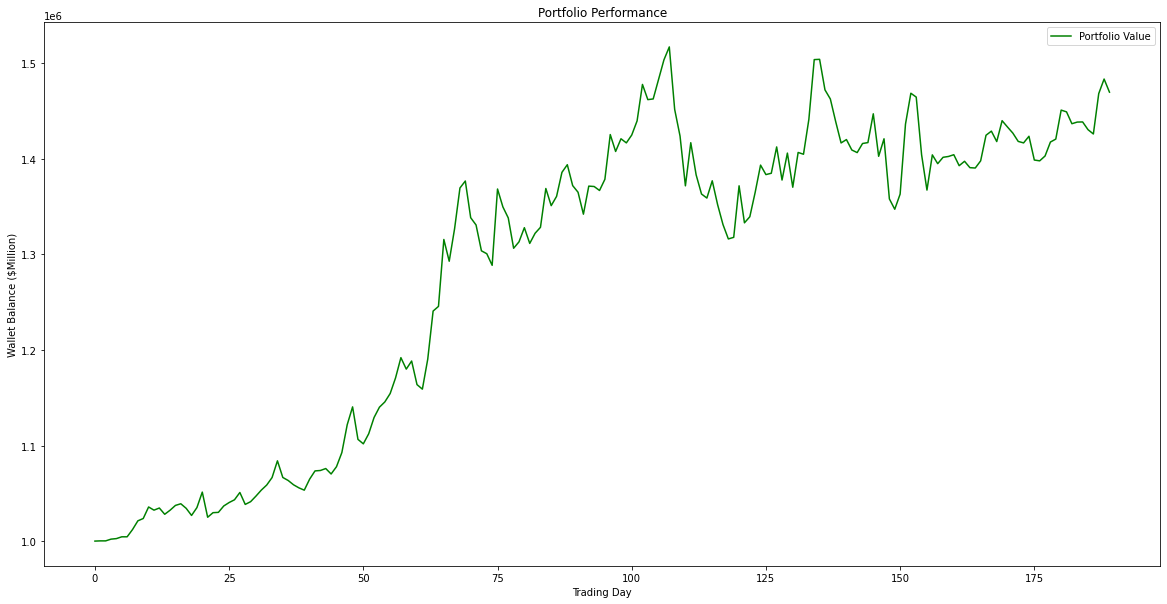

In [72]:
plt.figure(figsize=(20,10))
plt.plot(performance, color = 'green', label = 'Portfolio Value')


plt.title('Portfolio Performance')
plt.xlabel('Trading Day')
plt.ylabel("Wallet Balance ($Million)" )
plt.legend()
plt.show()

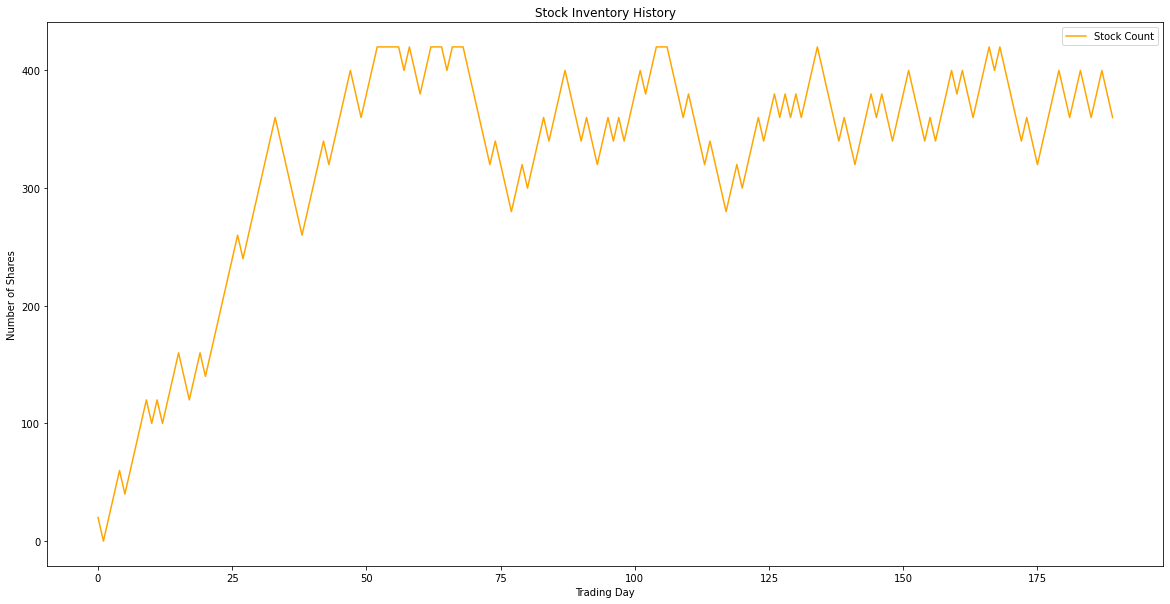

In [73]:
plt.figure(figsize=(20,10))

plt.plot(stock_count, color = 'orange', label = 'Stock Count')

plt.title('Stock Inventory History')
plt.xlabel('Trading Day')
plt.ylabel("Number of Shares" )
plt.legend()
plt.show()

In [74]:
#Iterative Investing aka PaperHands
initial_balance = 1000000
duration = len(actual_close)-1
performance = np.array([])
stock_count = np.array([])
stocks = 0
balance = initial_balance
total_val = []
print("starting balance: $" + str(initial_balance))
for day in range(duration): 

    price_tdy = predicted_close[day]
    price_tmr = predicted_close[day +1]

    print('\n'+ "Trading day: " + str(day))
    print("Price Today: $" +"{:.2f}".format(price_tdy[0]))
    print("Predicted Price Tomorrow: $" + "{:.2f}".format(price_tmr[0]))
    
    if price_tmr < price_tdy:    #expected decrease in value
        buy = False
        print("The stock will depreciate")
    else: 
        buy = True
        print("BUY!")
        
    if buy == True: 
        buyPrice = actual_close[day] *20
        if balance - buyPrice >0:       #need enough money to buy
            stocks += 20               #buy 20 shares if price is going up tomorrow
            balance -= actual_close[day] *20
            print("Action Taken: Bought")
        else: 
            print("You don't have enough money to buy")
            print("Current Balance: $" + "{:.2f}".format(balance[0]))
    else:
        if stocks >=20:     #need enough stock to sell 
            price_tdy = actual_close[day]
            stocks -= 20              #sell 20 shares if price is going down
            balance += actual_close[day] *20
            print("Action Taken: Sold")
        else: 
            print("You don't have stock to sell")


    print("Number of Stocks: " + str(stocks))
    print("Portfolio Value: $" + str(stocks*actual_close[day]))
    total_val = balance + (stocks*actual_close[day])
    performance = np.append(performance,total_val)
    stock_count = np.append(stock_count, stocks)
    price_yester = price_tmr
    
    if day == duration-1:       #cashout
        print('\n' + "Last day of trading")
        print("Stock Inventory: " + str(stocks))

        balance += stocks * actual_close[day]
        print("ending balance: $" + "{:.2f}".format(balance[0]))
        end_balance = balance
        profit = end_balance - 1000000
        pct = (profit/1000000) * 100
        print("profit: $" + "{:.2f}".format(profit[0]))
        print("Return on investment: " + "{:.2f}".format(pct[0]) + "%")

starting balance: $1000000

Trading day: 0
Price Today: $1943.38
Predicted Price Tomorrow: $1895.10
The stock will depreciate
You don't have stock to sell
Number of Stocks: 0
Portfolio Value: $[0.]

Trading day: 1
Price Today: $1895.10
Predicted Price Tomorrow: $1910.52
BUY!
Action Taken: Bought
Number of Stocks: 20
Portfolio Value: $[38376.59912109]

Trading day: 2
Price Today: $1910.52
Predicted Price Tomorrow: $1899.39
The stock will depreciate
Action Taken: Sold
Number of Stocks: 0
Portfolio Value: $[0.]

Trading day: 3
Price Today: $1899.39
Predicted Price Tomorrow: $1980.02
BUY!
Action Taken: Bought
Number of Stocks: 20
Portfolio Value: $[39951.79931641]

Trading day: 4
Price Today: $1980.02
Predicted Price Tomorrow: $2000.20
BUY!
Action Taken: Bought
Number of Stocks: 40
Portfolio Value: $[80463.99902344]

Trading day: 5
Price Today: $2000.20
Predicted Price Tomorrow: $2021.95
BUY!
Action Taken: Bought
Number of Stocks: 60
Portfolio Value: $[122580.]

Trading day: 6
Price Today:

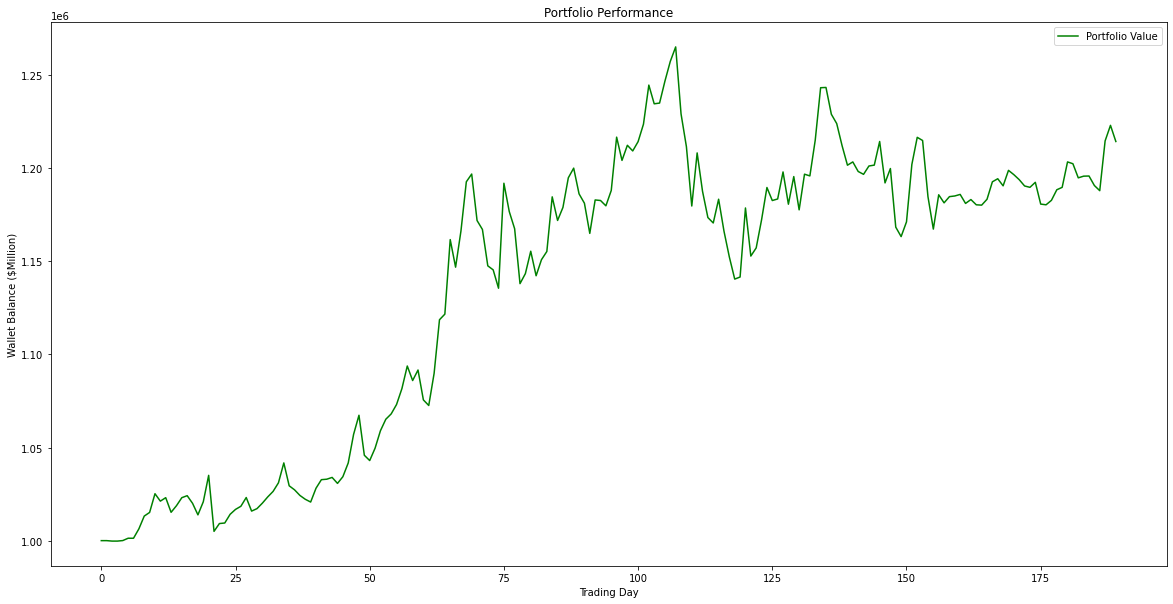

In [75]:
plt.figure(figsize=(20,10))
plt.plot(performance, color = 'green', label = 'Portfolio Value')
plt.title('Portfolio Performance')
plt.xlabel('Trading Day')
plt.ylabel("Wallet Balance ($Million)" )
plt.legend()
plt.show()

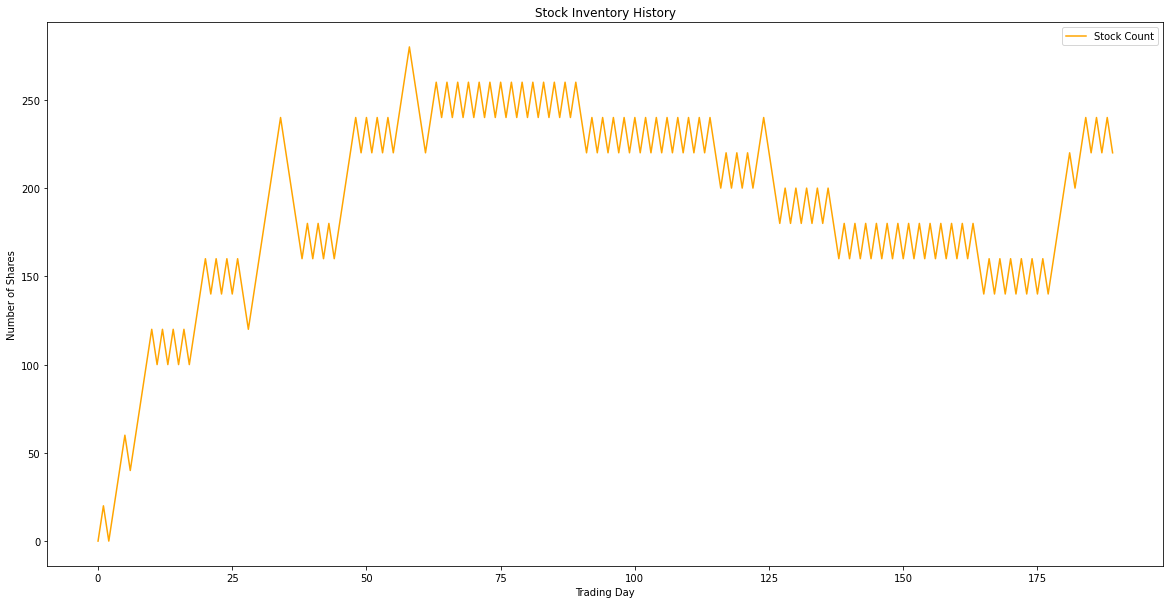

In [76]:
plt.figure(figsize=(20,10))
plt.plot(stock_count, color = 'orange', label = 'Stock Count')
plt.title('Stock Inventory History')
plt.xlabel('Trading Day')
plt.ylabel("Number of Shares" )
plt.legend()
plt.show()

## Regression Training

In [373]:
sc = MinMaxScaler(feature_range = (-1, 1))
sc_targ = MinMaxScaler(feature_range = (-1,1))
df_predicted_train = pd.DataFrame(predicted_train)
df_predicted_train = df_predicted_train.rename(columns = {0: 'High',1: 'Low',2:'Open',3:'Adj_close'})
regression_y_train = df_predicted_train.values
regression_y_train.shape
regression_y_train = sc_Regression.fit_transform(regression_y_train)

In [374]:
Regression_data_cols = ['Upper_volatility','Lower_volatility','Short_resistance',
                        'Short_support','Long_resistance','Long_support','trend_hit',
                        'Dow_jones','snp500','compound','neg','neu','pos','BF-B','CTAS',
                        'CPRT','AJG','HUM','MKTX','INFO','CHD','A','APD']

Regression_data_train = df_main_train[Regression_data_cols]

Regression_data_train
sc = MinMaxScaler(feature_range = (-1, 1))

Regression_train = Regression_data_train.values
Regression_train = Regression_train[20:]

Regression_data_test = df_main_test[Regression_data_cols]
Regression_test = Regression_data_test.values

Regression_data_train_scaled = sc_Regression.fit_transform(Regression_train)
Regression_data_test_scaled = sc_Regression.transform(Regression_test)

In [375]:
Regression_train = Regression_data_train.values
Regression_train = Regression_train[20:]

In [376]:
Regression_data_test = df_main_test[Regression_data_cols]
Regression_test = Regression_data_test.values

In [377]:
Regression_data_train_scaled = sc_Regression.fit_transform(Regression_train)
Regression_data_test_scaled = sc_Regression.transform(Regression_test)

In [378]:
y_train.shape

(707, 4)

In [379]:
Regression_test.shape

(211, 23)

In [380]:
Regression_data_train_scaled.shape

(707, 23)

In [381]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
def model(): 
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_shape = Regression_data_train_scaled.shape[1:], activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(124, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_squared_error','mean_absolute_error'])
    mod.summary()
    
    return mod

In [382]:
regressor = KerasRegressor(build_fn = model, batch_size = 16, epochs = 2000)

In [383]:
callback_mc=tensorflow.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')

callback_es=tensorflow.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=30, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True)

Regression_results = regressor.fit(Regression_data_train_scaled,regression_y_train, callbacks = [callback_mc,callback_es])

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 32)                768       
_________________________________________________________________
dense_172 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_173 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_174 (Dense)            (None, 124)               8060      
_________________________________________________________________
dense_175 (Dense)            (None, 4)                 500       
Total params: 15,600
Trainable params: 15,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 878us/step - loss: 0.4255 - accuracy: 0.6527 - mean_square

In [384]:
new_predicted = regressor.predict(Regression_data_test_scaled)
new_predicted_close_scaled = new_predicted[20:,3:4]
actual_close = actual_stock_price[:,3:4]
#new_predicted_close = sc.inverse_transform(new_predicted_close)


In [385]:
regress_mse = mean_squared_error(new_predicted_close_scaled, y_test[:,3:4])
regress_mse

0.07036802216496538

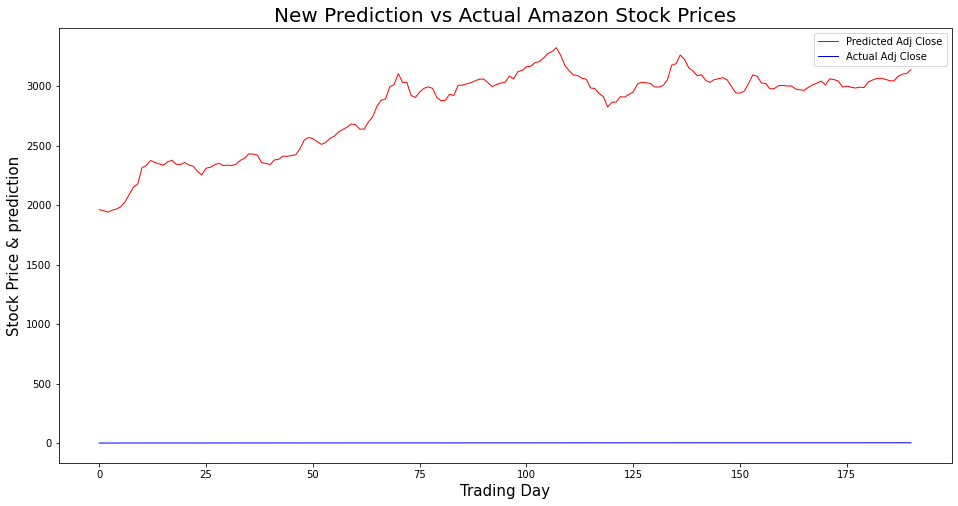

In [386]:
plt.figure(figsize=(16,8))
plt.plot(new_predicted_close, color = 'red', label = 'Predicted Adj Close', linewidth=1.0)
plt.plot(y_test[:,3:4], color = 'blue', label = 'Actual Adj Close', linewidth=1.0)

plt.title('New Prediction vs Actual Amazon Stock Prices', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)

plt.legend()
plt.show()

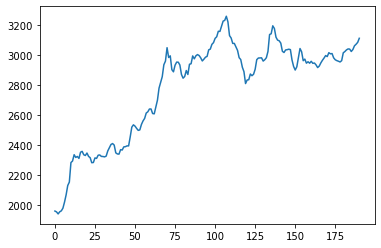

In [387]:
re_close = sc_Target.inverse_transform(new_predicted)
new_predicted_close = re_close[20:,3:4]
plt.plot(new_predicted_close)

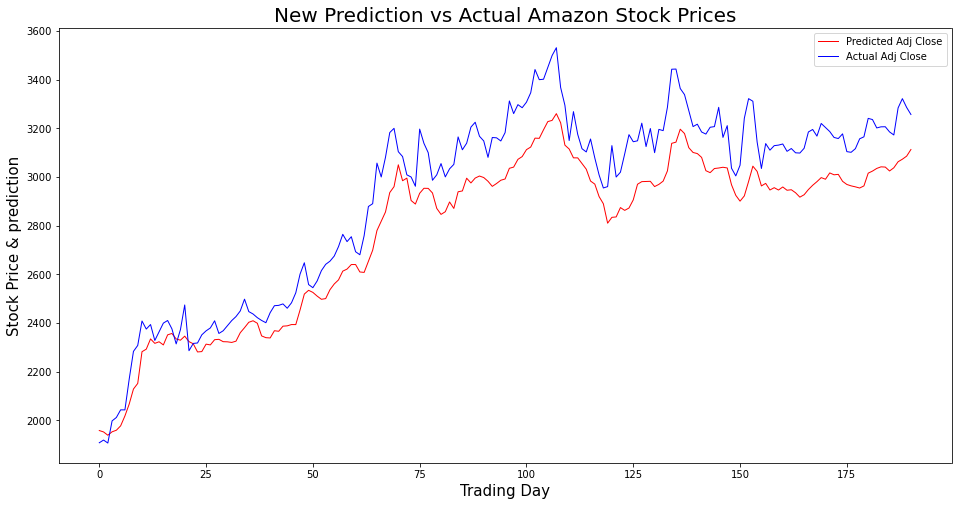

In [388]:
plt.figure(figsize=(16,8))
plt.plot(new_predicted_close, color = 'red', label = 'Predicted Adj Close', linewidth=1.0)
plt.plot(actual_close, color = 'blue', label = 'Actual Adj Close', linewidth=1.0)

plt.title('New Prediction vs Actual Amazon Stock Prices', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)

plt.legend()
plt.show()

In [389]:
#Iterative Investing aka PaperHands
initial_balance = 1000000
duration = len(actual_close)-1
performance = np.array([])
stock_count = np.array([])
stocks = 0
balance = initial_balance
total_val = []
print("starting balance: $" + str(initial_balance))
for day in range(duration): 

    price_tdy = new_predicted_close[day]
    price_tmr = new_predicted_close[day +1]

    print('\n'+ "Trading day: " + str(day))
    print("Price Today: $" +"{:.2f}".format(price_tdy[0]))
    print("Predicted Price Tomorrow: $" + "{:.2f}".format(price_tmr[0]))
    
    if price_tmr < price_tdy:    #expected decrease in value
        buy = False
        print("The stock will depreciate")
    else: 
        buy = True
        print("BUY!")
        
    if buy == True: 
        buyPrice = actual_close[day] *20
        if balance - buyPrice >0:       #need enough money to buy
            stocks += 20               #buy 20 shares if price is going up tomorrow
            balance -= actual_close[day] *20
            print("Action Taken: Bought")
        else: 
            print("You don't have enough money to buy")
            print("Current Balance: $" + "{:.2f}".format(balance[0]))
    else:
        if stocks >=20:     #need enough stock to sell 
            price_tdy = actual_close[day]
            stocks -= 20              #sell 20 shares if price is going down
            balance += actual_close[day] *20
            print("Action Taken: Sold")
        else: 
            print("You don't have stock to sell")


    print("Number of Stocks: " + str(stocks))
    print("Portfolio Value: $" + str(stocks*actual_close[day]))
    total_val = balance + (stocks*actual_close[day])
    performance = np.append(performance,total_val)
    stock_count = np.append(stock_count, stocks)
    price_yester = price_tmr
    
    if day == duration-1:       #cashout
        print('\n' + "Last day of trading")
        print("Stock Inventory: " + str(stocks))

        balance += stocks * actual_close[day]
        print("ending balance: $" + "{:.2f}".format(balance[0]))
        end_balance = balance
        profit = end_balance - 1000000
        pct = (profit/1000000) * 100
        print("profit: $" + "{:.2f}".format(profit[0]))
        print("Return on investment: " + "{:.2f}".format(pct[0]) + "%")

starting balance: $1000000

Trading day: 0
Price Today: $1957.93
Predicted Price Tomorrow: $1952.23
The stock will depreciate
You don't have stock to sell
Number of Stocks: 0
Portfolio Value: $[0.]

Trading day: 1
Price Today: $1952.23
Predicted Price Tomorrow: $1938.68
The stock will depreciate
You don't have stock to sell
Number of Stocks: 0
Portfolio Value: $[0.]

Trading day: 2
Price Today: $1938.68
Predicted Price Tomorrow: $1952.73
BUY!
Action Taken: Bought
Number of Stocks: 20
Portfolio Value: $[38131.79931641]

Trading day: 3
Price Today: $1952.73
Predicted Price Tomorrow: $1959.22
BUY!
Action Taken: Bought
Number of Stocks: 40
Portfolio Value: $[79903.59863281]

Trading day: 4
Price Today: $1959.22
Predicted Price Tomorrow: $1977.23
BUY!
Action Taken: Bought
Number of Stocks: 60
Portfolio Value: $[120695.99853516]

Trading day: 5
Price Today: $1977.23
Predicted Price Tomorrow: $2017.90
BUY!
Action Taken: Bought
Number of Stocks: 80
Portfolio Value: $[163440.]

Trading day: 6
P

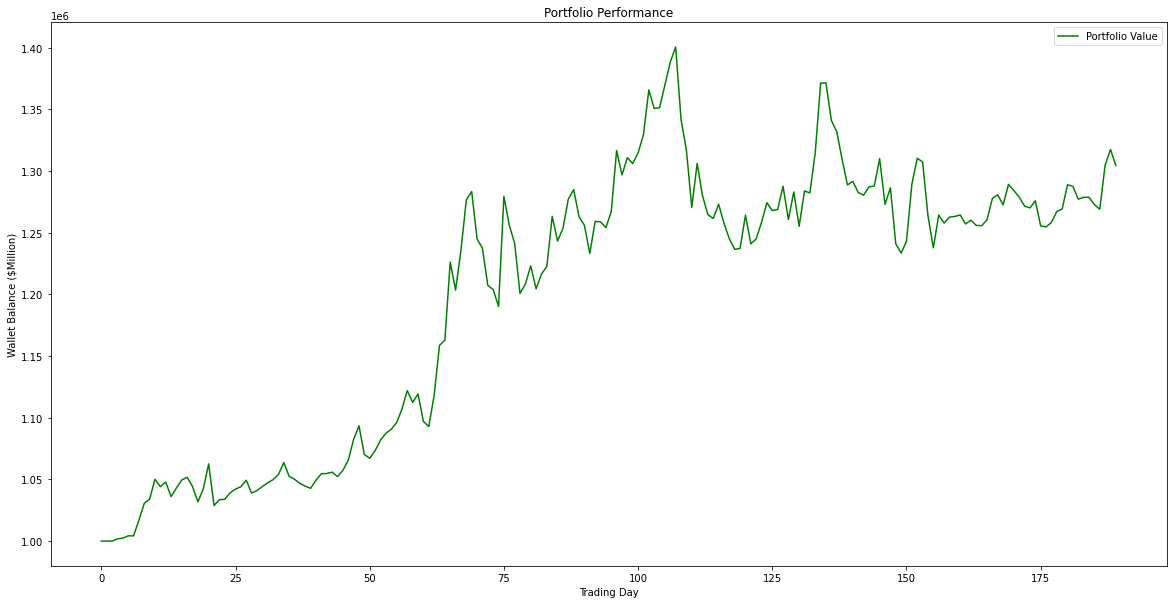

In [390]:
plt.figure(figsize=(20,10))
plt.plot(performance, color = 'green', label = 'Portfolio Value')
plt.title('Portfolio Performance')
plt.xlabel('Trading Day')
plt.ylabel("Wallet Balance ($Million)" )
plt.legend()
plt.show()

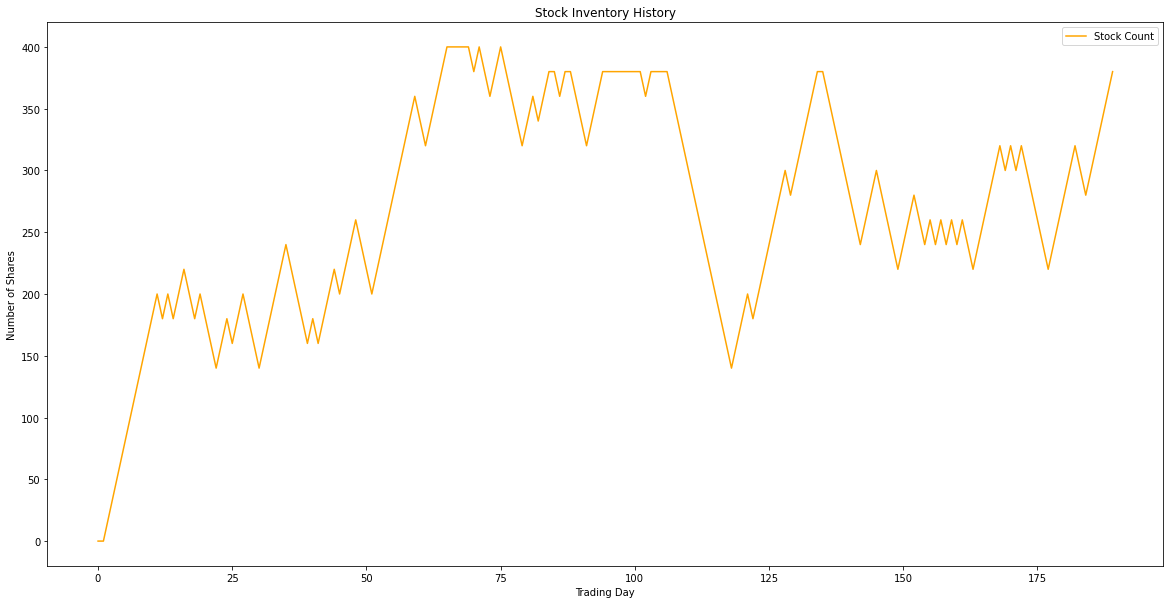

In [391]:
plt.figure(figsize=(20,10))
plt.plot(stock_count, color = 'orange', label = 'Stock Count')
plt.title('Stock Inventory History')
plt.xlabel('Trading Day')
plt.ylabel("Number of Shares" )
plt.legend()
plt.show()

In [392]:
#Iterative Investing aka PaperHands
initial = 10000
duration = len(actual_close)-1
performance = np.array([])
stock_count = np.array([])
stocks = 0
balance = initial
total_val = []
quant = 1          #number of stocks to buy each iteration
print("starting balance: $" + str(initial_balance))
for day in range(duration): 

    price_tdy = new_predicted_close[day]
    price_tmr = new_predicted_close[day +1]

    print('\n'+ "Trading day: " + str(day))
    print("Price Today: $" +"{:.2f}".format(price_tdy[0]))
    print("Predicted Price Tomorrow: $" + "{:.2f}".format(price_tmr[0]))
    
    if price_tmr < price_tdy:    #expected decrease in value
        buy = False
        print("The stock will depreciate")
    else: 
        buy = True
        print("BUY!")
        
    if buy == True: 
        buyPrice = actual_close[day] *quant
        if balance - buyPrice >0:       #need enough money to buy
            stocks += quant              #buy shares if price is going up tomorrow
            balance -= actual_close[day] *quant
            print("Action Taken: Bought")
        else: 
            print("You don't have enough money to buy")
            print("Current Balance: $" + "{:.2f}".format(balance[0]))
    else:
        if stocks >=quant:     #need enough stock to sell 
            price_tdy = actual_close[day]
            stocks -= quant              #sell shares if price is going down
            balance += actual_close[day] *quant
            print("Action Taken: Sold")
        else: 
            print("You don't have stock to sell")


    print("Number of Stocks: " + str(stocks))
    print("Portfolio Value: $" + str(stocks*actual_close[day]))
    total_val = balance + (stocks*actual_close[day])
    performance = np.append(performance,total_val)
    stock_count = np.append(stock_count, stocks)
    price_yester = price_tmr
    
    if day == duration-1:       #cashout
        print('\n' + "Last day of trading")
        print("Stock Inventory: " + str(stocks))

        balance += stocks * actual_close[day]
        print("ending balance: $" + "{:.2f}".format(balance[0]))
        end_balance = balance
        profit = end_balance - initial
        pct = (profit/initial) * 100
        print("profit: $" + "{:.2f}".format(profit[0]))
        print("Return on investment: " + "{:.2f}".format(pct[0]) + "%")

starting balance: $1000000

Trading day: 0
Price Today: $1957.93
Predicted Price Tomorrow: $1952.23
The stock will depreciate
You don't have stock to sell
Number of Stocks: 0
Portfolio Value: $[0.]

Trading day: 1
Price Today: $1952.23
Predicted Price Tomorrow: $1938.68
The stock will depreciate
You don't have stock to sell
Number of Stocks: 0
Portfolio Value: $[0.]

Trading day: 2
Price Today: $1938.68
Predicted Price Tomorrow: $1952.73
BUY!
Action Taken: Bought
Number of Stocks: 1
Portfolio Value: $[1906.58996582]

Trading day: 3
Price Today: $1952.73
Predicted Price Tomorrow: $1959.22
BUY!
Action Taken: Bought
Number of Stocks: 2
Portfolio Value: $[3995.17993164]

Trading day: 4
Price Today: $1959.22
Predicted Price Tomorrow: $1977.23
BUY!
Action Taken: Bought
Number of Stocks: 3
Portfolio Value: $[6034.79992676]

Trading day: 5
Price Today: $1977.23
Predicted Price Tomorrow: $2017.90
BUY!
Action Taken: Bought
Number of Stocks: 4
Portfolio Value: $[8172.]

Trading day: 6
Price Today

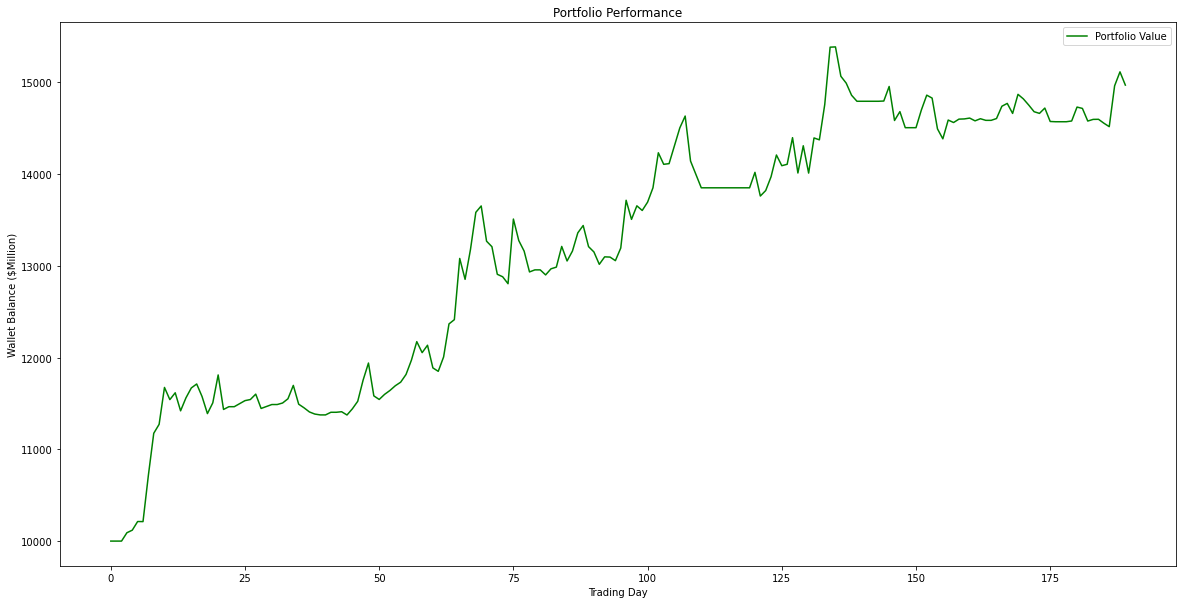

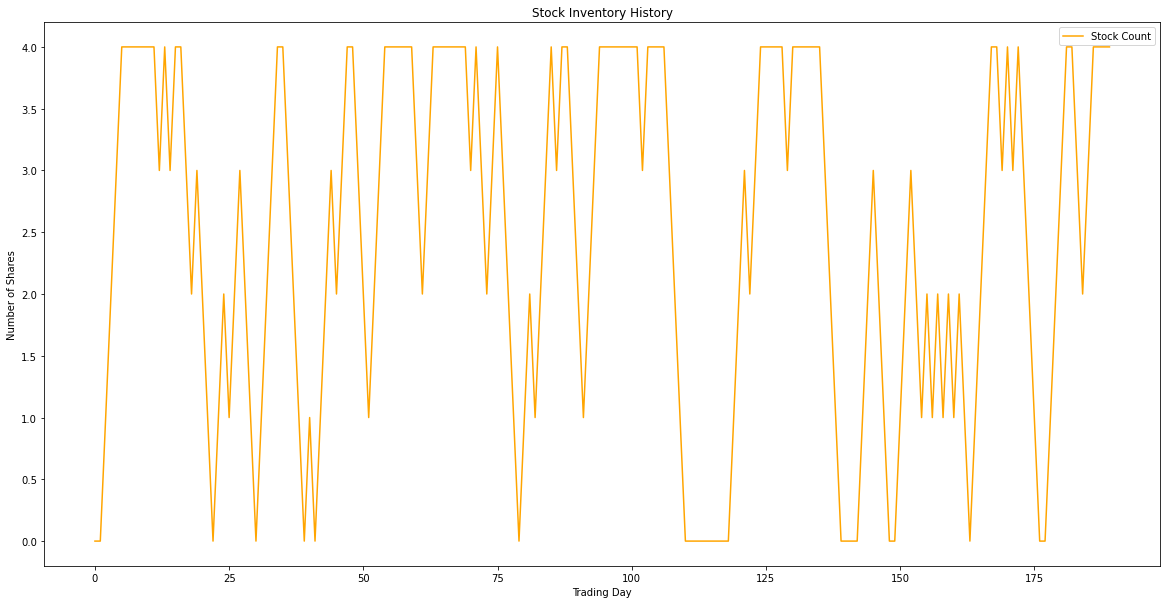

In [393]:
plt.figure(figsize=(20,10))
plt.plot(performance, color = 'green', label = 'Portfolio Value')
plt.title('Portfolio Performance')
plt.xlabel('Trading Day')
plt.ylabel("Wallet Balance ($Million)" )
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(stock_count, color = 'orange', label = 'Stock Count')
plt.title('Stock Inventory History')
plt.xlabel('Trading Day')
plt.ylabel("Number of Shares" )
plt.legend()
plt.show()

In [394]:
Regression_data_cols = ['trend_hit',
                        'Dow_jones','snp500','compound','neg','neu','pos','BF-B','CTAS',
                        'CPRT','AJG','HUM','MKTX','INFO','CHD','A','APD']

Regression_data_train = df_main_train[Regression_data_cols]

Regression_data_train
sc = MinMaxScaler(feature_range = (-1, 1))

Regression_train = Regression_data_train.values
Regression_train = Regression_train[20:]

Regression_data_test = df_main_test[Regression_data_cols]
Regression_test = Regression_data_test.values

Regression_data_train_scaled = sc_Regression.fit_transform(Regression_train)
Regression_data_test_scaled = sc_Regression.transform(Regression_test)

In [395]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
def model(): 
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_shape = Regression_data_train_scaled.shape[1:], activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(124, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_squared_error','mean_absolute_error'])
    mod.summary()
    
    return mod

In [396]:
regressor = KerasRegressor(build_fn = model, batch_size = 16, epochs = 2000)

callback_mc=tensorflow.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')

callback_es=tensorflow.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=30, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True)

Regression_results = regressor.fit(Regression_data_train_scaled,regression_y_train, callbacks = [callback_mc,callback_es])

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 32)                576       
_________________________________________________________________
dense_177 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_178 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_179 (Dense)            (None, 124)               8060      
_________________________________________________________________
dense_180 (Dense)            (None, 4)                 500       
Total params: 15,408
Trainable params: 15,408
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 812us/step - loss: 0.4281 - accuracy: 0.8058 - mean_square

45/45 [==============================] - 0s 870us/step - loss: 0.0498 - accuracy: 0.8437 - mean_squared_error: 0.0046 - mean_absolute_error: 0.0498
Epoch 96/2000
45/45 [==============================] - 0s 817us/step - loss: 0.0431 - accuracy: 0.7285 - mean_squared_error: 0.0037 - mean_absolute_error: 0.0431
Epoch 97/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.8650 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0402
Epoch 98/2000
45/45 [==============================] - 0s 782us/step - loss: 0.0409 - accuracy: 0.7612 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0409
Epoch 99/2000
45/45 [==============================] - 0s 795us/step - loss: 0.0430 - accuracy: 0.8526 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0430
Epoch 100/2000
45/45 [==============================] - 0s 814us/step - loss: 0.0364 - accuracy: 0.7716 - mean_squared_error: 0.0027 - mean_absolute_error: 0.0364
Epoch 101/2000
45/45 [=====================

45/45 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.7999 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0303
Epoch 196/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.6421 - mean_squared_error: 0.0022 - mean_absolute_error: 0.0337
Epoch 197/2000
45/45 [==============================] - 0s 920us/step - loss: 0.0320 - accuracy: 0.7528 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0320
Epoch 198/2000
45/45 [==============================] - 0s 938us/step - loss: 0.0281 - accuracy: 0.8061 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0281
Epoch 199/2000
45/45 [==============================] - 0s 982us/step - loss: 0.0273 - accuracy: 0.7782 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0273
Epoch 200/2000
45/45 [==============================] - 0s 923us/step - loss: 0.0316 - accuracy: 0.7291 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0316
Epoch 201/2000
45/45 [===================

45/45 [==============================] - 0s 872us/step - loss: 0.0270 - accuracy: 0.8007 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0270
Epoch 296/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.7276 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0254
Epoch 297/2000
45/45 [==============================] - 0s 869us/step - loss: 0.0198 - accuracy: 0.7895 - mean_squared_error: 7.6609e-04 - mean_absolute_error: 0.0198
Epoch 298/2000
45/45 [==============================] - 0s 882us/step - loss: 0.0234 - accuracy: 0.7813 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0234
Epoch 299/2000
45/45 [==============================] - 0s 930us/step - loss: 0.0231 - accuracy: 0.7625 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0231
Epoch 300/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.8367 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0247
Epoch 301/2000
45/45 [===============

In [397]:
new_predicted = regressor.predict(Regression_data_test_scaled)
new_predicted_close_scaled = new_predicted[20:,3:4]
actual_close = actual_stock_price[:,3:4]

regress_mse = mean_squared_error(new_predicted_close_scaled, y_test[:,3:4])
regress_mse

3.5917578230160525

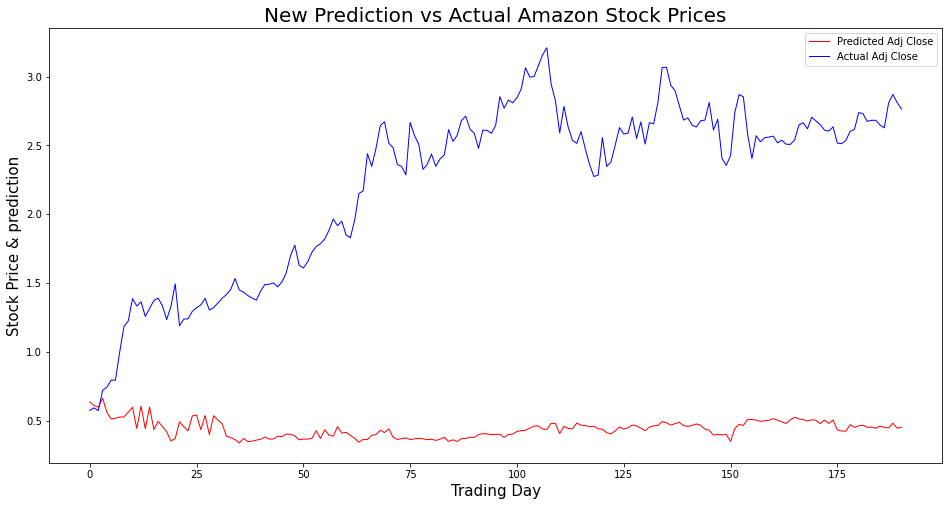

In [398]:
plt.figure(figsize=(16,8))
plt.plot(new_predicted_close_scaled, color = 'red', label = 'Predicted Adj Close', linewidth=1.0)
plt.plot(y_test[:,3:4], color = 'blue', label = 'Actual Adj Close', linewidth=1.0)

plt.title('New Prediction vs Actual Amazon Stock Prices', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)

plt.legend()
plt.show()

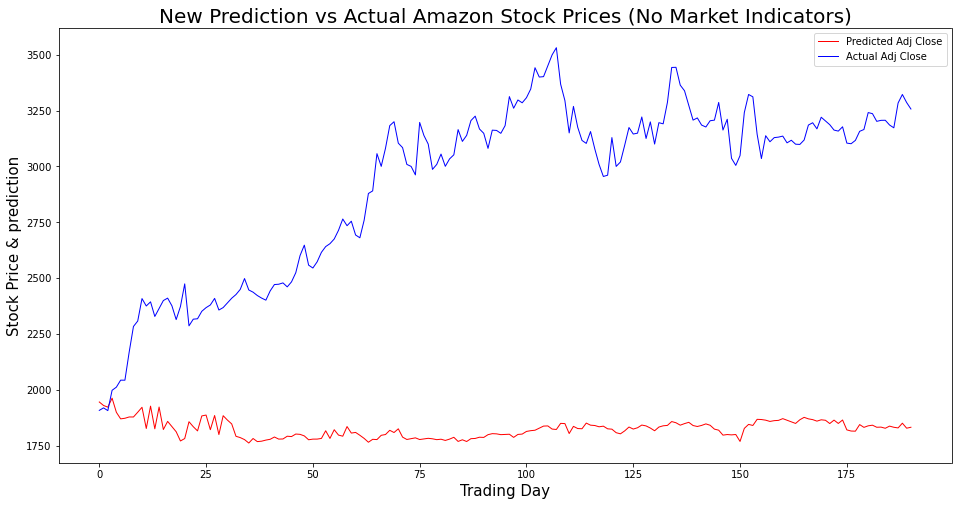

In [399]:
re_close = sc_Target.inverse_transform(new_predicted)
new_predicted_close = re_close[20:,3:4]

plt.figure(figsize=(16,8))
plt.plot(new_predicted_close, color = 'red', label = 'Predicted Adj Close', linewidth=1.0)
plt.plot(actual_close, color = 'blue', label = 'Actual Adj Close', linewidth=1.0)

plt.title('New Prediction vs Actual Amazon Stock Prices (No Market Indicators)', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)

plt.legend()
plt.show()

In [400]:
Regression_data_cols = ['Upper_volatility','Lower_volatility','Short_resistance',
                        'Short_support','Long_resistance','Long_support','trend_hit',
                        'compound','neg','neu','pos','BF-B','CTAS',
                        'CPRT','AJG','HUM','MKTX','INFO','CHD','A','APD']

Regression_data_train = df_main_train[Regression_data_cols]

Regression_data_train
sc = MinMaxScaler(feature_range = (-1, 1))

Regression_train = Regression_data_train.values
Regression_train = Regression_train[20:]

Regression_data_test = df_main_test[Regression_data_cols]
Regression_test = Regression_data_test.values

Regression_data_train_scaled = sc_Regression.fit_transform(Regression_train)
Regression_data_test_scaled = sc_Regression.transform(Regression_test)

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
def model(): 
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_shape = Regression_data_train_scaled.shape[1:], activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(124, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_squared_error','mean_absolute_error'])
    mod.summary()
    
    return mod


regressor = KerasRegressor(build_fn = model, batch_size = 16, epochs = 2000)

callback_mc=tensorflow.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')

callback_es=tensorflow.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=30, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True)

Regression_results = regressor.fit(Regression_data_train_scaled,regression_y_train, callbacks = [callback_mc,callback_es])

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 32)                704       
_________________________________________________________________
dense_182 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_183 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_184 (Dense)            (None, 124)               8060      
_________________________________________________________________
dense_185 (Dense)            (None, 4)                 500       
Total params: 15,536
Trainable params: 15,536
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 870us/step - loss: 0.4193 - accuracy: 0.0961 - mean_square

45/45 [==============================] - 0s 957us/step - loss: 0.0213 - accuracy: 0.7651 - mean_squared_error: 7.8478e-04 - mean_absolute_error: 0.0213
Epoch 96/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.8188 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0278
Epoch 97/2000
45/45 [==============================] - 0s 954us/step - loss: 0.0217 - accuracy: 0.7628 - mean_squared_error: 8.7268e-04 - mean_absolute_error: 0.0217
Epoch 98/2000
45/45 [==============================] - 0s 947us/step - loss: 0.0213 - accuracy: 0.7651 - mean_squared_error: 8.2195e-04 - mean_absolute_error: 0.0213
Epoch 99/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.7317 - mean_squared_error: 9.4909e-04 - mean_absolute_error: 0.0238
Epoch 100/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.7822 - mean_squared_error: 6.4492e-04 - mean_absolute_error: 0.0184
Epoch 101/2000
45/45 [=====

In [401]:
new_predicted = regressor.predict(Regression_data_test_scaled)
new_predicted_close_scaled = new_predicted[20:,3:4]
actual_close = actual_stock_price[:,3:4]

regress_mse = mean_squared_error(new_predicted_close_scaled, y_test[:,3:4])
regress_mse

0.04025089595032127

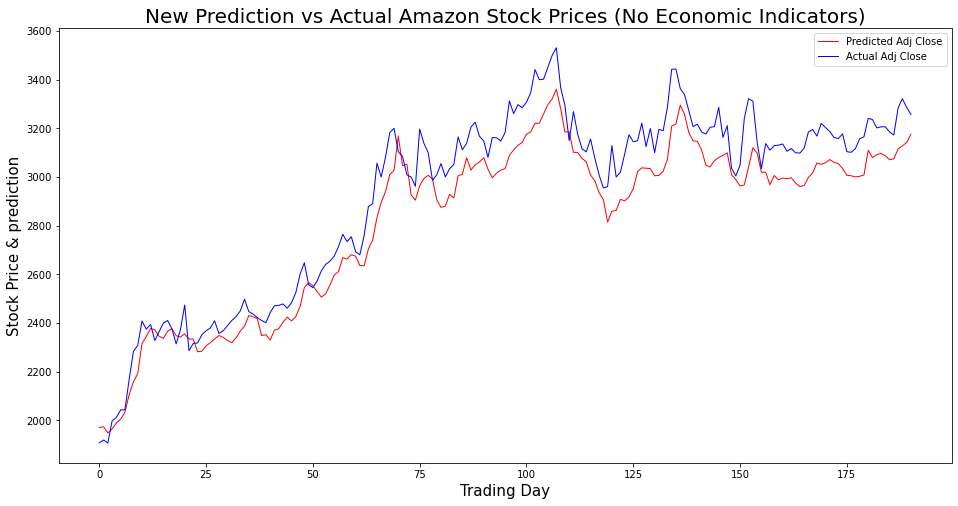

In [402]:
re_close = sc_Target.inverse_transform(new_predicted)
new_predicted_close = re_close[20:,3:4]

plt.figure(figsize=(16,8))
plt.plot(new_predicted_close, color = 'red', label = 'Predicted Adj Close', linewidth=1.0)
plt.plot(actual_close, color = 'blue', label = 'Actual Adj Close', linewidth=1.0)

plt.title('New Prediction vs Actual Amazon Stock Prices (No Economic Indicators)', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)

plt.legend()
plt.show()

In [403]:
Regression_data_cols = ['Upper_volatility','Lower_volatility','Short_resistance',
                        'Short_support','Long_resistance','Long_support','trend_hit',
                        'Dow_jones','snp500','compound','neg','neu','pos']
Regression_data_train = df_main_train[Regression_data_cols]

Regression_data_train
sc = MinMaxScaler(feature_range = (-1, 1))

Regression_train = Regression_data_train.values
Regression_train = Regression_train[20:]

Regression_data_test = df_main_test[Regression_data_cols]
Regression_test = Regression_data_test.values

Regression_data_train_scaled = sc_Regression.fit_transform(Regression_train)
Regression_data_test_scaled = sc_Regression.transform(Regression_test)

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
def model(): 
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_shape = Regression_data_train_scaled.shape[1:], activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(124, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_squared_error','mean_absolute_error'])
    mod.summary()
    
    return mod


regressor = KerasRegressor(build_fn = model, batch_size = 16, epochs = 2000)

callback_mc=tensorflow.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')

callback_es=tensorflow.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=30, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True)

Regression_results = regressor.fit(Regression_data_train_scaled,regression_y_train, callbacks = [callback_mc,callback_es])

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 32)                448       
_________________________________________________________________
dense_187 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_188 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_189 (Dense)            (None, 124)               8060      
_________________________________________________________________
dense_190 (Dense)            (None, 4)                 500       
Total params: 15,280
Trainable params: 15,280
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 923us/step - loss: 0.4472 - accuracy: 0.0117 - mean_square

45/45 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.8215 - mean_squared_error: 8.8896e-04 - mean_absolute_error: 0.0221
Epoch 96/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.8693 - mean_squared_error: 6.4057e-04 - mean_absolute_error: 0.0190
Epoch 97/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.7194 - mean_squared_error: 7.0190e-04 - mean_absolute_error: 0.0201
Epoch 98/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.7653 - mean_squared_error: 7.5719e-04 - mean_absolute_error: 0.0203
Epoch 99/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.6893 - mean_squared_error: 8.3179e-04 - mean_absolute_error: 0.0208
Epoch 100/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.8511 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0248
Epoch 101/2000
45/45 [===========

In [404]:
new_predicted = regressor.predict(Regression_data_test_scaled)
new_predicted_close_scaled = new_predicted[20:,3:4]
actual_close = actual_stock_price[:,3:4]

regress_mse = mean_squared_error(new_predicted_close_scaled, y_test[:,3:4])
regress_mse

0.05165252969600861

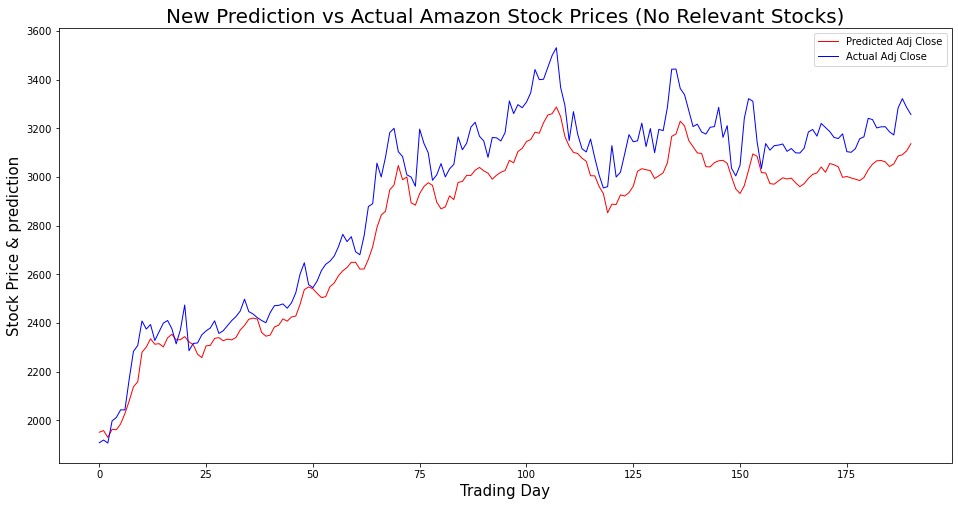

In [405]:
re_close = sc_Target.inverse_transform(new_predicted)
new_predicted_close = re_close[20:,3:4]

plt.figure(figsize=(16,8))
plt.plot(new_predicted_close, color = 'red', label = 'Predicted Adj Close', linewidth=1.0)
plt.plot(actual_close, color = 'blue', label = 'Actual Adj Close', linewidth=1.0)

plt.title('New Prediction vs Actual Amazon Stock Prices (No Relevant Stocks)', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)

plt.legend()
plt.show()

In [406]:
Regression_data_cols = ['Upper_volatility','Lower_volatility','Short_resistance',
                        'Short_support','Long_resistance','Long_support','trend_hit',
                        'Dow_jones','snp500','BF-B','CTAS',
                        'CPRT','AJG','HUM','MKTX','INFO','CHD','A','APD']

Regression_data_train = df_main_train[Regression_data_cols]

Regression_data_train
sc = MinMaxScaler(feature_range = (-1, 1))

Regression_train = Regression_data_train.values
Regression_train = Regression_train[20:]

Regression_data_test = df_main_test[Regression_data_cols]
Regression_test = Regression_data_test.values

Regression_data_train_scaled = sc_Regression.fit_transform(Regression_train)
Regression_data_test_scaled = sc_Regression.transform(Regression_test)

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
def model(): 
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_shape = Regression_data_train_scaled.shape[1:], activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(124, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_squared_error','mean_absolute_error'])
    mod.summary()
    
    return mod


regressor = KerasRegressor(build_fn = model, batch_size = 16, epochs = 2000)

callback_mc=tensorflow.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')

callback_es=tensorflow.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=30, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True)

Regression_results = regressor.fit(Regression_data_train_scaled,regression_y_train, callbacks = [callback_mc,callback_es])

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 32)                640       
_________________________________________________________________
dense_192 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_193 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_194 (Dense)            (None, 124)               8060      
_________________________________________________________________
dense_195 (Dense)            (None, 4)                 500       
Total params: 15,472
Trainable params: 15,472
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 984us/step - loss: 0.4293 - accuracy: 0.8172 - mean_square

45/45 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.8252 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0249
Epoch 96/2000
45/45 [==============================] - 0s 974us/step - loss: 0.0216 - accuracy: 0.7671 - mean_squared_error: 8.1111e-04 - mean_absolute_error: 0.0216
Epoch 97/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.8657 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0237
Epoch 98/2000
45/45 [==============================] - 0s 955us/step - loss: 0.0252 - accuracy: 0.7124 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0252
Epoch 99/2000
45/45 [==============================] - 0s 925us/step - loss: 0.0241 - accuracy: 0.5756 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0241
Epoch 100/2000
45/45 [==============================] - 0s 905us/step - loss: 0.0242 - accuracy: 0.5939 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0242
Epoch 101/2000
45/45 [===================

45/45 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.8344 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0252
Epoch 146/2000
45/45 [==============================] - 0s 978us/step - loss: 0.0221 - accuracy: 0.8144 - mean_squared_error: 9.0651e-04 - mean_absolute_error: 0.0221
Epoch 147/2000
45/45 [==============================] - 0s 965us/step - loss: 0.0246 - accuracy: 0.8008 - mean_squared_error: 9.9929e-04 - mean_absolute_error: 0.0246
Epoch 148/2000
45/45 [==============================] - 0s 944us/step - loss: 0.0220 - accuracy: 0.8448 - mean_squared_error: 8.5158e-04 - mean_absolute_error: 0.0220
Epoch 149/2000
45/45 [==============================] - 0s 938us/step - loss: 0.0228 - accuracy: 0.7715 - mean_squared_error: 9.4200e-04 - mean_absolute_error: 0.0228
Epoch 150/2000
45/45 [==============================] - 0s 962us/step - loss: 0.0213 - accuracy: 0.7781 - mean_squared_error: 8.2095e-04 - mean_absolute_error: 0.0213
Epoch 151/2000
45/4

In [407]:
new_predicted = regressor.predict(Regression_data_test_scaled)
new_predicted_close_scaled = new_predicted[20:,3:4]
actual_close = actual_stock_price[:,3:4]

regress_mse = mean_squared_error(new_predicted_close_scaled, y_test[:,3:4])
regress_mse

0.04542123858915706

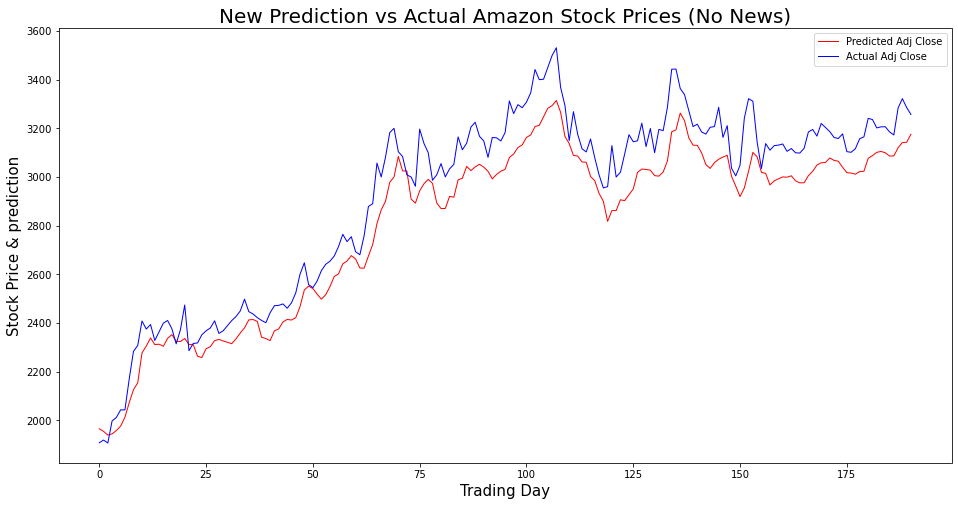

In [408]:
re_close = sc_Target.inverse_transform(new_predicted)
new_predicted_close = re_close[20:,3:4]

plt.figure(figsize=(16,8))
plt.plot(new_predicted_close, color = 'red', label = 'Predicted Adj Close', linewidth=1.0)
plt.plot(actual_close, color = 'blue', label = 'Actual Adj Close', linewidth=1.0)

plt.title('New Prediction vs Actual Amazon Stock Prices (No News)', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)

plt.legend()
plt.show()

In [409]:
Regression_data_cols = ['Upper_volatility','Lower_volatility','Short_resistance',
                        'Short_support','Long_resistance','Long_support',
                        'Dow_jones','snp500','compound','neg','neu','pos','BF-B','CTAS',
                        'CPRT','AJG','HUM','MKTX','INFO','CHD','A','APD']

Regression_data_train = df_main_train[Regression_data_cols]

Regression_data_train
sc = MinMaxScaler(feature_range = (-1, 1))

Regression_train = Regression_data_train.values
Regression_train = Regression_train[20:]

Regression_data_test = df_main_test[Regression_data_cols]
Regression_test = Regression_data_test.values

Regression_data_train_scaled = sc_Regression.fit_transform(Regression_train)
Regression_data_test_scaled = sc_Regression.transform(Regression_test)

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
def model(): 
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_shape = Regression_data_train_scaled.shape[1:], activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(124, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_squared_error','mean_absolute_error'])
    mod.summary()
    
    return mod


regressor = KerasRegressor(build_fn = model, batch_size = 16, epochs = 2000)

callback_mc=tensorflow.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')

callback_es=tensorflow.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=30, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True)

Regression_results = regressor.fit(Regression_data_train_scaled,regression_y_train, callbacks = [callback_mc,callback_es])

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 32)                736       
_________________________________________________________________
dense_197 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_198 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_199 (Dense)            (None, 124)               8060      
_________________________________________________________________
dense_200 (Dense)            (None, 4)                 500       
Total params: 15,568
Trainable params: 15,568
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 908us/step - loss: 0.4121 - accuracy: 0.8242 - mean_square

45/45 [==============================] - 0s 905us/step - loss: 0.0236 - accuracy: 0.6723 - mean_squared_error: 9.5644e-04 - mean_absolute_error: 0.0236
Epoch 96/2000
45/45 [==============================] - 0s 893us/step - loss: 0.0307 - accuracy: 0.8097 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0307
Epoch 97/2000
45/45 [==============================] - 0s 919us/step - loss: 0.0201 - accuracy: 0.6652 - mean_squared_error: 7.5209e-04 - mean_absolute_error: 0.0201
Epoch 98/2000
45/45 [==============================] - 0s 934us/step - loss: 0.0190 - accuracy: 0.8272 - mean_squared_error: 6.8538e-04 - mean_absolute_error: 0.0190
Epoch 99/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.7829 - mean_squared_error: 7.7552e-04 - mean_absolute_error: 0.0216
Epoch 100/2000
45/45 [==============================] - 0s 945us/step - loss: 0.0274 - accuracy: 0.7818 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0274
Epoch 101/2000
45/45 [=====

In [410]:
new_predicted = regressor.predict(Regression_data_test_scaled)
new_predicted_close_scaled = new_predicted[20:,3:4]
actual_close = actual_stock_price[:,3:4]

regress_mse = mean_squared_error(new_predicted_close_scaled, y_test[:,3:4])
regress_mse

0.04874245459162543

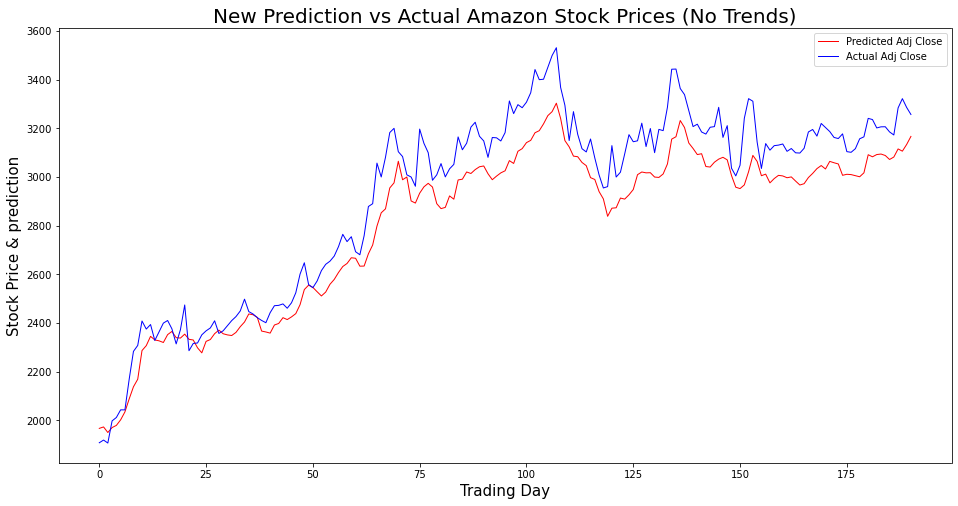

In [411]:
re_close = sc_Target.inverse_transform(new_predicted)
new_predicted_close = re_close[20:,3:4]

plt.figure(figsize=(16,8))
plt.plot(new_predicted_close, color = 'red', label = 'Predicted Adj Close', linewidth=1.0)
plt.plot(actual_close, color = 'blue', label = 'Actual Adj Close', linewidth=1.0)

plt.title('New Prediction vs Actual Amazon Stock Prices (No Trends)', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)

plt.legend()
plt.show()

In [412]:
Regression_data_cols = ['Upper_volatility','Lower_volatility','Short_resistance',
                        'Short_support','Long_resistance','Long_support',
                        'compound','neg','neu','pos','BF-B','CTAS',
                        'CPRT','AJG','HUM','MKTX','INFO','CHD','A','APD']

Regression_data_train = df_main_train[Regression_data_cols]

Regression_data_train
sc = MinMaxScaler(feature_range = (-1, 1))

Regression_train = Regression_data_train.values
Regression_train = Regression_train[20:]

Regression_data_test = df_main_test[Regression_data_cols]
Regression_test = Regression_data_test.values

Regression_data_train_scaled = sc_Regression.fit_transform(Regression_train)
Regression_data_test_scaled = sc_Regression.transform(Regression_test)

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
def model(): 
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_shape = Regression_data_train_scaled.shape[1:], activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(124, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_squared_error','mean_absolute_error'])
    mod.summary()
    
    return mod


regressor = KerasRegressor(build_fn = model, batch_size = 16, epochs = 2000)

callback_mc=tensorflow.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')

callback_es=tensorflow.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=30, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True)

Regression_results = regressor.fit(Regression_data_train_scaled,regression_y_train, callbacks = [callback_mc,callback_es])

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 32)                672       
_________________________________________________________________
dense_202 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_203 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_204 (Dense)            (None, 124)               8060      
_________________________________________________________________
dense_205 (Dense)            (None, 4)                 500       
Total params: 15,504
Trainable params: 15,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 980us/step - loss: 0.4162 - accuracy: 0.5098 - mean_square

45/45 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.6297 - mean_squared_error: 6.9320e-04 - mean_absolute_error: 0.0193
Epoch 96/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.8183 - mean_squared_error: 8.9547e-04 - mean_absolute_error: 0.0224
Epoch 97/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.7701 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0248
Epoch 98/2000
45/45 [==============================] - 0s 953us/step - loss: 0.0208 - accuracy: 0.7736 - mean_squared_error: 8.0817e-04 - mean_absolute_error: 0.0208
Epoch 99/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.7762 - mean_squared_error: 8.9633e-04 - mean_absolute_error: 0.0221
Epoch 100/2000
45/45 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.7493 - mean_squared_error: 6.6454e-04 - mean_absolute_error: 0.0189
Epoch 101/2000
45/45 [=========

In [413]:
new_predicted = regressor.predict(Regression_data_test_scaled)
new_predicted_close_scaled = new_predicted[20:,3:4]
actual_close = actual_stock_price[:,3:4]

regress_mse = mean_squared_error(new_predicted_close_scaled, y_test[:,3:4])
regress_mse

0.009199507608983488

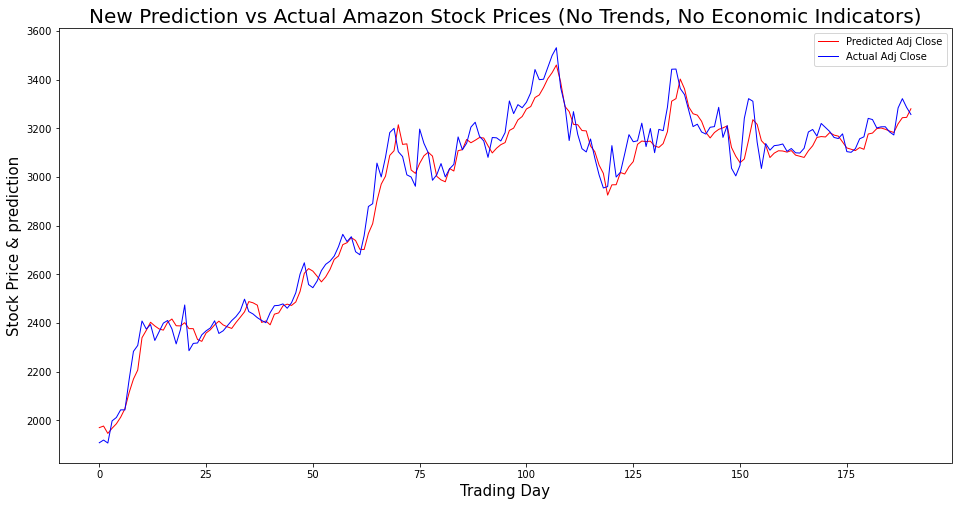

In [414]:
re_close = sc_Target.inverse_transform(new_predicted)
new_predicted_close = re_close[20:,3:4]

plt.figure(figsize=(16,8))
plt.plot(new_predicted_close, color = 'red', label = 'Predicted Adj Close', linewidth=1.0)
plt.plot(actual_close, color = 'blue', label = 'Actual Adj Close', linewidth=1.0)

plt.title('New Prediction vs Actual Amazon Stock Prices (No Trends, No Economic Indicators)', fontsize=20)
plt.xlabel('Trading Day', fontsize=15)
plt.ylabel('Stock Price & prediction', fontsize=15)

plt.legend()
plt.show()

In [415]:
#Iterative Investing aka PaperHands
initial = 10000
duration = len(actual_close)-1
performance = np.array([])
stock_count = np.array([])
stocks = 0
balance = initial
total_val = []
quant = 1          #number of stocks to buy each iteration
print("starting balance: $" + str(initial_balance))
for day in range(duration): 

    price_tdy = new_predicted_close[day]
    price_tmr = new_predicted_close[day +1]

    print('\n'+ "Trading day: " + str(day))
    print("Price Today: $" +"{:.2f}".format(price_tdy[0]))
    print("Predicted Price Tomorrow: $" + "{:.2f}".format(price_tmr[0]))
    
    if price_tmr < price_tdy:    #expected decrease in value
        buy = False
        print("The stock will depreciate")
    else: 
        buy = True
        print("BUY!")
        
    if buy == True: 
        buyPrice = actual_close[day] *quant
        if balance - buyPrice >0:       #need enough money to buy
            stocks += quant              #buy shares if price is going up tomorrow
            balance -= actual_close[day] *quant
            print("Action Taken: Bought")
        else: 
            print("You don't have enough money to buy")
            print("Current Balance: $" + "{:.2f}".format(balance[0]))
    else:
        if stocks >=quant:     #need enough stock to sell 
            price_tdy = actual_close[day]
            stocks -= quant              #sell shares if price is going down
            balance += actual_close[day] *quant
            print("Action Taken: Sold")
        else: 
            print("You don't have stock to sell")


    print("Number of Stocks: " + str(stocks))
    print("Portfolio Value: $" + str(stocks*actual_close[day]))
    total_val = balance + (stocks*actual_close[day])
    performance = np.append(performance,total_val)
    stock_count = np.append(stock_count, stocks)
    price_yester = price_tmr
    
    if day == duration-1:       #cashout
        print('\n' + "Last day of trading")
        print("Stock Inventory: " + str(stocks))

        balance += stocks * actual_close[day]
        print("ending balance: $" + "{:.2f}".format(balance[0]))
        end_balance = balance
        profit = end_balance - initial
        pct = (profit/initial) * 100
        print("profit: $" + "{:.2f}".format(profit[0]))
        print("Return on investment: " + "{:.2f}".format(pct[0]) + "%")

starting balance: $1000000

Trading day: 0
Price Today: $1969.86
Predicted Price Tomorrow: $1976.39
BUY!
Action Taken: Bought
Number of Stocks: 1
Portfolio Value: $[1907.69995117]

Trading day: 1
Price Today: $1976.39
Predicted Price Tomorrow: $1946.17
The stock will depreciate
Action Taken: Sold
Number of Stocks: 0
Portfolio Value: $[0.]

Trading day: 2
Price Today: $1946.17
Predicted Price Tomorrow: $1967.39
BUY!
Action Taken: Bought
Number of Stocks: 1
Portfolio Value: $[1906.58996582]

Trading day: 3
Price Today: $1967.39
Predicted Price Tomorrow: $1985.68
BUY!
Action Taken: Bought
Number of Stocks: 2
Portfolio Value: $[3995.17993164]

Trading day: 4
Price Today: $1985.68
Predicted Price Tomorrow: $2012.49
BUY!
Action Taken: Bought
Number of Stocks: 3
Portfolio Value: $[6034.79992676]

Trading day: 5
Price Today: $2012.49
Predicted Price Tomorrow: $2047.76
BUY!
Action Taken: Bought
Number of Stocks: 4
Portfolio Value: $[8172.]

Trading day: 6
Price Today: $2047.76
Predicted Price T

NameError: name 'df_main_test' is not defined